In [ ]:
import gdown
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
import os
import time

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as plt_image

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image as keras_image

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Flatten, Dense, Dropout

from tensorflow.keras.callbacks import TensorBoard
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Sekarang, Anda dapat mengakses Drive di folder /content/drive/MyDrive/


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile

zip_path = '/content/drive/MyDrive/Kaggle/archive_3.zip' # Sesuaikan path dengan lokasi file zip Anda di Google Drive
extract_path = '/content/'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


In [ ]:
import zipfile

zip_path_normal_skin = '/content/drive/MyDrive/Kaggle/normal skin.zip' # Sesuaikan path dengan lokasi file zip normal skin di Google Drive
extract_path_normal_skin = '/content/'

with zipfile.ZipFile(zip_path_normal_skin, 'r') as zip_ref_normal_skin:
    zip_ref_normal_skin.extractall(extract_path_normal_skin)


In [ ]:
import os

# Path ke folder yang berisi gambar-gambar
image_folder = '/content/melanoma_cancer_dataset'

# Daftar nama folder
folder_names = [folder for folder in os.listdir(image_folder) if os.path.isdir(os.path.join(image_folder, folder))]

# Tampilkan daftar nama folder
print("Nama-nama folder:")
for folder_name in folder_names:
    print(folder_name)

    # Path ke subfolder di dalam setiap folder
    subfolder_path = os.path.join(image_folder, folder_name)

    # Daftar nama subfolder di dalam setiap folder
    subfolder_names = [subfolder for subfolder in os.listdir(subfolder_path) if os.path.isdir(os.path.join(subfolder_path, subfolder))]

    # Tampilkan daftar nama subfolder di dalam setiap folder
    print("Subfolder di dalam folder", folder_name)
    for subfolder_name in subfolder_names:
        print(subfolder_name)


Nama-nama folder:
train
Subfolder di dalam folder train
benign
malignant
test
Subfolder di dalam folder test
benign
malignant


Folder: benign


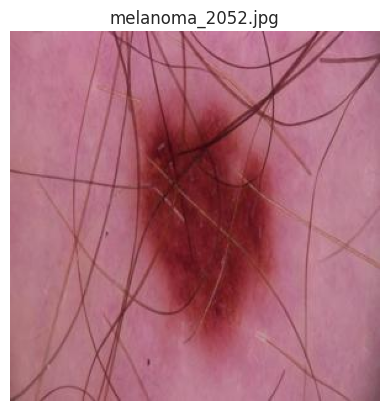

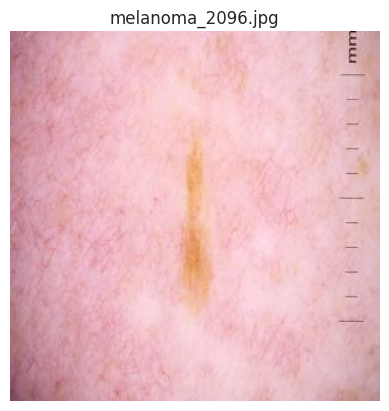

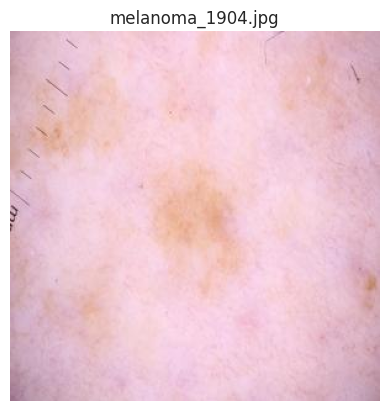

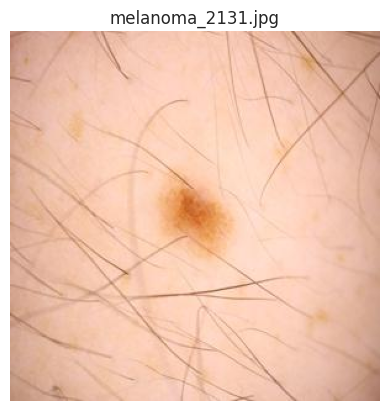

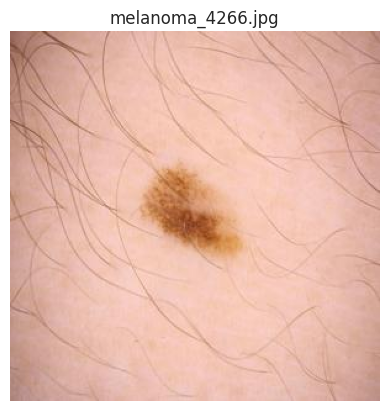

Folder: malignant


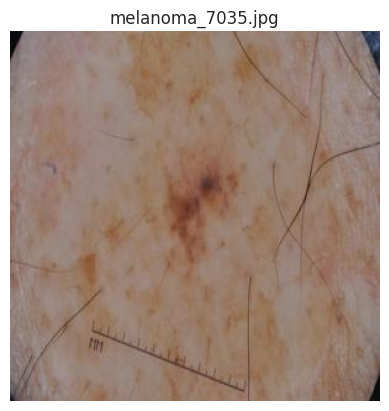

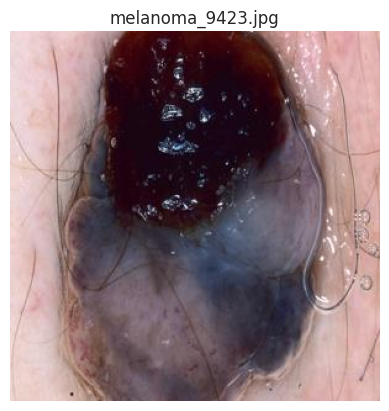

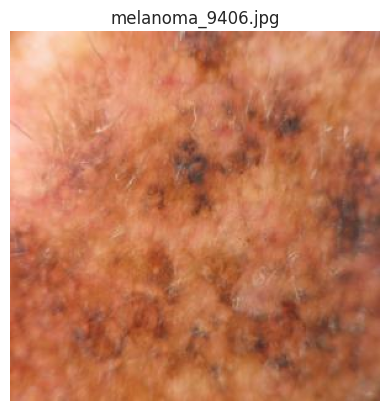

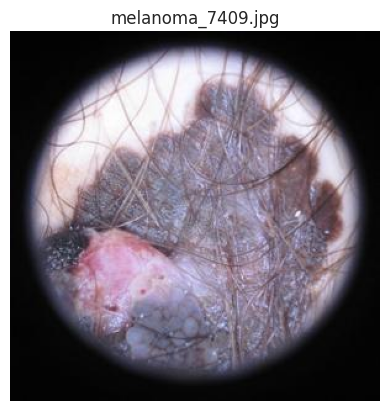

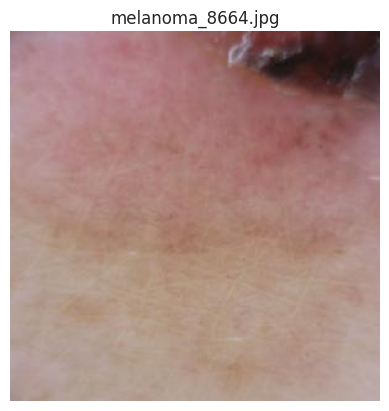

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Path ke folder yang berisi gambar-gambar
image_folder = '/content/melanoma_cancer_dataset/train'

# Daftar nama folder
folder_names = [folder for folder in os.listdir(image_folder) if os.path.isdir(os.path.join(image_folder, folder))]

# Tampilkan 5 gambar dari setiap folder
for folder_name in folder_names:
    print(f"Folder: {folder_name}")
    folder_path = os.path.join(image_folder, folder_name)
    image_files = [file for file in os.listdir(folder_path) if file.endswith(('jpg', 'jpeg', 'png', 'gif'))]

    # Hanya menampilkan maksimal 5 gambar
    for i in range(min(5, len(image_files))):
        img_path = os.path.join(folder_path, image_files[i])
        img = Image.open(img_path)

        plt.imshow(img)
        plt.axis('off')
        plt.title(image_files[i])
        plt.show()


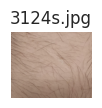

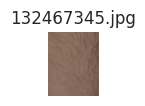

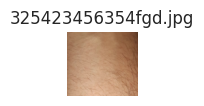

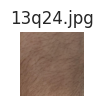

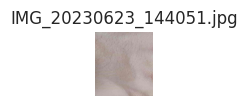

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path ke folder yang berisi gambar-gambar
image_folder_skin = "/content/normal skin"

# Mendapatkan daftar nama file gambar di folder
image_files_skin = os.listdir(image_folder_skin)

# Menampilkan 5 gambar dalam grid 1x1
num_images = min(5, len(image_files_skin))

# Menampilkan gambar-gambar
plt.figure(figsize=(5, 5))
for i in range(num_images):
    # Path lengkap untuk tiap gambar
    image_file_skin = image_files_skin[i]
    image_path_skin = os.path.join(image_folder_skin, image_file_skin)
    # Membaca gambar
    img_skin = mpimg.imread(image_path_skin)
    # Menampilkan gambar
    plt.subplot(5, 1, i+1)  # Menampilkan gambar dalam grid 1x1
    plt.imshow(img_skin)
    plt.axis('off')
    plt.title(image_file_skin)
    plt.show()
    print()

Folder: benign


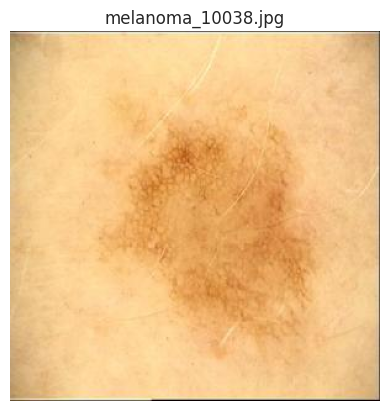

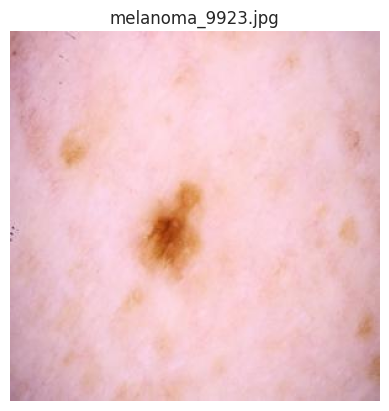

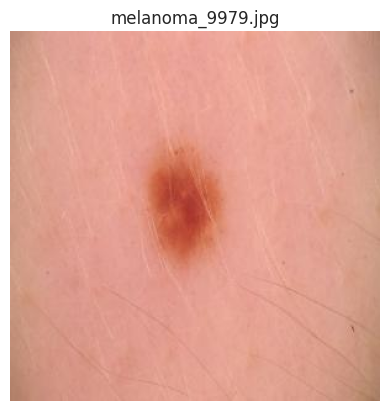

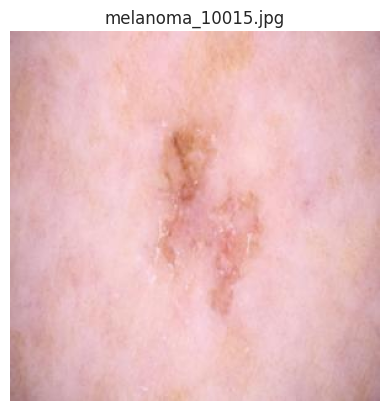

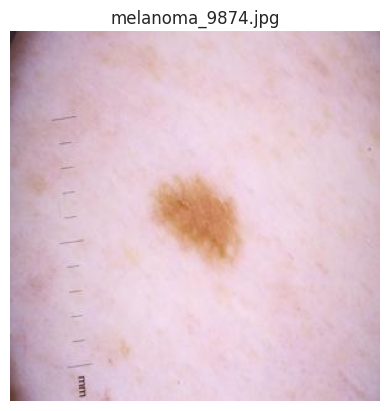

Folder: malignant


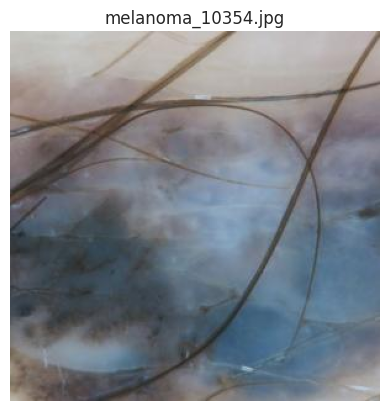

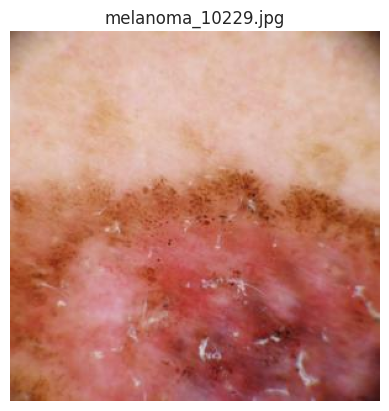

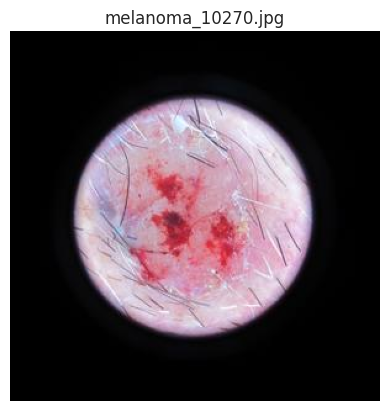

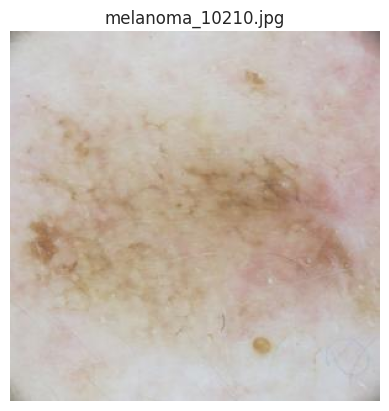

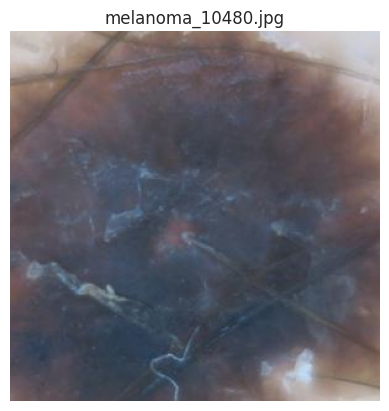

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Path ke folder yang berisi gambar-gambar
image_folder = '/content/melanoma_cancer_dataset/test'

# Daftar nama folder
folder_names = [folder for folder in os.listdir(image_folder) if os.path.isdir(os.path.join(image_folder, folder))]

# Tampilkan 5 gambar dari setiap folder
for folder_name in folder_names:
    print(f"Folder: {folder_name}")
    folder_path = os.path.join(image_folder, folder_name)
    image_files = [file for file in os.listdir(folder_path) if file.endswith(('jpg', 'jpeg', 'png', 'gif'))]

    # Hanya menampilkan maksimal 5 gambar
    for i in range(min(5, len(image_files))):
        img_path = os.path.join(folder_path, image_files[i])
        img = Image.open(img_path)

        plt.imshow(img)
        plt.axis('off')
        plt.title(image_files[i])
        plt.show()


In [ ]:
!pip install tensorflow
!pip install keras_cv
import os
os.environ["KERAS_BACKEND"] = "jax" # or "tensorflow", "torch"

import cv2
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plot
sns.set(style="whitegrid")

import tensorflow as tf
import keras_cv
import keras_core as keras
from keras_core import ops

In [ ]:
from PIL import Image

Image.MAX_IMAGE_PIXELS = None

In [ ]:
import os
import pandas as pd
from PIL import Image

# Tentukan path folder gambar
base_path = '/content/melanoma_cancer_dataset/train'

# Inisialisasi list untuk menyimpan path gambar dan label
image_paths = []
labels = []

# Loop melalui setiap kategori (rock, paper, scissors)
categories = ['benign','malignant']

for category in categories:
    category_path = os.path.join(base_path, f'{category}')
    category_files = os.listdir(category_path)

    # Loop melalui setiap gambar dalam kategori tertentu
    for image_file in category_files:
        # Bangun path lengkap ke gambar
        image_path = os.path.join(category_path, image_file)

        # Simpan path gambar dan label ke dalam list
        image_paths.append(image_path)
        labels.append(category)

# Buat dataframe
data = {'Image_Path': image_paths, 'Label': labels}
df = pd.DataFrame(data)


In [ ]:
df

Image_Path      Label
0     /content/melanoma_cancer_dataset/train/benign/...     benign
1     /content/melanoma_cancer_dataset/train/benign/...     benign
2     /content/melanoma_cancer_dataset/train/benign/...     benign
3     /content/melanoma_cancer_dataset/train/benign/...     benign
4     /content/melanoma_cancer_dataset/train/benign/...     benign
...                                                 ...        ...
9600  /content/melanoma_cancer_dataset/train/maligna...  malignant
9601  /content/melanoma_cancer_dataset/train/maligna...  malignant
9602  /content/melanoma_cancer_dataset/train/maligna...  malignant
9603  /content/melanoma_cancer_dataset/train/maligna...  malignant
9604  /content/melanoma_cancer_dataset/train/maligna...  malignant

[9605 rows x 2 columns]

In [ ]:
import os
from PIL import Image, ImageEnhance

# Path ke folder yang berisi gambar-gambar
image_folder_skin = "/content/normal skin"

# Mendapatkan daftar nama file gambar di folder
image_files_skin = os.listdir(image_folder_skin)

# Membuat folder baru untuk menyimpan hasil augmentasi
output_folder = "/content/augmented_skin"
os.makedirs(output_folder, exist_ok=True)

# Membuat daftar augmentasi yang ingin dilakukan
augmentations = [
    ("original", lambda img: img),  # Tidak ada augmentasi
    ("rotate1", lambda img: img.rotate(45)),  # Rotasi 45 derajat
    ("rotate2", lambda img: img.rotate(2*45)),  # Rotasi 90 derajat
    ("rotate3", lambda img: img.rotate(3*45)),  # Rotasi 135 derajat
    ("rotate4", lambda img: img.rotate(4*45)),  # Rotasi 180 derajat
    ("rotate5", lambda img: img.rotate(5*45)),  # Rotasi 225 derajat
    ("rotate6", lambda img: img.rotate(6*45)),  # Rotasi 270 derajat
    ("rotate7", lambda img: img.rotate(7*45)),  # Rotasi 315 derajat
    ("grayscale", lambda img: img.convert("L")),  # Konversi ke grayscale
    ("enhanced", lambda img: ImageEnhance.Contrast(img).enhance(2.0)),  # Meningkatkan kejelasan
    ("horizontal_flip", lambda img: img.transpose(method=Image.FLIP_LEFT_RIGHT)),  # Flip horizontal
    ("vertical_flip", lambda img: img.transpose(method=Image.FLIP_TOP_BOTTOM)),  # Flip vertikal
    ("zoom_in", lambda img: img.crop((20, 20, img.width - 20, img.height - 20))),  # Perbesar (crop)
    ("zoom_out", lambda img: img.resize((int(img.width*0.8), int(img.height*0.8))))  # Perkecil
]

# Melakukan augmentasi pada setiap gambar
for image_file in image_files_skin:
    image_path = os.path.join(image_folder_skin, image_file)
    with Image.open(image_path) as img:
        # Melakukan setiap jenis augmentasi
        for name, func in augmentations:
            augmented_img = func(img.copy())
            # Menyimpan gambar hasil augmentasi
            output_path = os.path.join(output_folder, f"{name}_{image_file}")
            augmented_img.save(output_path)

print("Augmentasi selesai.")


Augmentasi selesai.


In [ ]:
import os
import pandas as pd

# Mendefinisikan direktori
image_dir = "/content/augmented_skin"

# Mendapatkan list semua file di direktori
image_files = os.listdir(image_dir)

# Filter hanya file gambar
image_files = [file for file in image_files if file.endswith('.jpg')]

# Membuat list path lengkap untuk setiap gambar
image_paths = [os.path.join(image_dir, img_file) for img_file in image_files]

# Membuat DataFrame
df1 = pd.DataFrame({'Image_Path': image_paths, 'Label': 'normal'})



In [ ]:
df1

Image_Path   Label
0            /content/augmented_skin/rotate2_321412.jpg  normal
1          /content/augmented_skin/grayscale_sdcvzx.jpg  normal
2     /content/augmented_skin/rotate4_13241324xasfd.jpg  normal
3     /content/augmented_skin/original_IMG_20230624_...  normal
4          /content/augmented_skin/zoom_out_32dasdf.jpg  normal
...                                                 ...     ...
1731      /content/augmented_skin/vertical_flip_785.jpg  normal
1732       /content/augmented_skin/rotate1_31241351.jpg  normal
1733          /content/augmented_skin/enhanced_4324.jpg  normal
1734  /content/augmented_skin/rotate7_IMG_20230623_1...  normal
1735  /content/augmented_skin/original_IMG_20230623_...  normal

[1736 rows x 2 columns]

In [ ]:
df

Image_Path      Label
0     /content/melanoma_cancer_dataset/train/benign/...     benign
1     /content/melanoma_cancer_dataset/train/benign/...     benign
2     /content/melanoma_cancer_dataset/train/benign/...     benign
3     /content/melanoma_cancer_dataset/train/benign/...     benign
4     /content/melanoma_cancer_dataset/train/benign/...     benign
...                                                 ...        ...
9600  /content/melanoma_cancer_dataset/train/maligna...  malignant
9601  /content/melanoma_cancer_dataset/train/maligna...  malignant
9602  /content/melanoma_cancer_dataset/train/maligna...  malignant
9603  /content/melanoma_cancer_dataset/train/maligna...  malignant
9604  /content/melanoma_cancer_dataset/train/maligna...  malignant

[9605 rows x 2 columns]

In [ ]:
import pandas as pd

# Misalkan df adalah dataframe Anda yang berisi data
# Contoh: df = pd.read_csv('path_to_your_file.csv') atau df sudah ada di memori

# Menghitung jumlah label "benign" dan "malignant"
label_counts = df['Label'].value_counts()

# Menampilkan hasilnya
print(label_counts)


Label
benign       5000
malignant    4605
Name: count, dtype: int64


In [ ]:
# Menggabungkan dua dataframe secara kebawah
df = pd.concat([df, df1], ignore_index=True)


In [ ]:
# Membuat dictionary untuk encoding label
label_encoding = {'normal': 0, 'benign': 1, 'malignant': 2}

# Encoding label secara manual
df['Label'] = df['Label'].map(label_encoding)


In [ ]:
df

Image_Path  Label
0      /content/melanoma_cancer_dataset/train/benign/...      1
1      /content/melanoma_cancer_dataset/train/benign/...      1
2      /content/melanoma_cancer_dataset/train/benign/...      1
3      /content/melanoma_cancer_dataset/train/benign/...      1
4      /content/melanoma_cancer_dataset/train/benign/...      1
...                                                  ...    ...
11336      /content/augmented_skin/vertical_flip_785.jpg      0
11337       /content/augmented_skin/rotate1_31241351.jpg      0
11338          /content/augmented_skin/enhanced_4324.jpg      0
11339  /content/augmented_skin/rotate7_IMG_20230623_1...      0
11340  /content/augmented_skin/original_IMG_20230623_...      0

[11341 rows x 2 columns]

#AUC

##5

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from sklearn.metrics import roc_auc_score, classification_report

# Path ke model yang sudah dilatih
model_path = '/content/drive/MyDrive/Kaggle/best_model_5_trial.h5'
model = tf.keras.models.load_model(model_path)

# Fungsi untuk memuat dan memproses gambar
def load_and_preprocess_image(image_path, img_size=(256, 256)):
    img = image.load_img(image_path, target_size=img_size)
    img_array = image.img_to_array(img) / 255.0  # Normalisasi gambar
    return img_array

# Mengonversi gambar dari DataFrame
X_images = np.array([load_and_preprocess_image(img_path) for img_path in df['Image_Path']])
y_labels = df['Label'].values  # Label dari DataFrame

# Melakukan prediksi dengan model
y_pred_prob = model.predict(X_images)

# Menghitung AUC per kelas
auc_per_class = []
for i in range(3):  # Ada 3 kelas: Normal, Benign, Malignant
    auc_class = roc_auc_score(y_labels == i, y_pred_prob[:, i])
    auc_per_class.append(auc_class)
    print(f"AUC for class {i}: {auc_class:.4f}")

# Menghitung AUC micro average
micro_auc = roc_auc_score(y_labels, y_pred_prob, multi_class='ovr', average='micro')
print(f"\nAUC (Micro Average): {micro_auc:.4f}")

# Menghitung prediksi kelas dengan model (bukan probabilitas)
y_pred = np.argmax(y_pred_prob, axis=1)

# Menghasilkan classification report
report = classification_report(y_labels, y_pred, target_names=['Normal', 'Benign', 'Malignant'])
print("\nClassification Report:")
print(report)


355/355 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step
AUC for class 0: 0.9940
AUC for class 1: 0.9581
AUC for class 2: 0.9531

AUC (Micro Average): 0.9710

Classification Report:
              precision    recall  f1-score   support

      Normal       0.89      0.95      0.92      1736
      Benign       0.89      0.86      0.88      5000
   Malignant       0.86      0.86      0.86      4605

    accuracy                           0.88     11341
   macro avg       0.88      0.89      0.89     11341
weighted avg       0.88      0.88      0.88     11341



In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.model_selection import train_test_split

# Path ke model yang sudah dilatih
model_path = '/content/drive/MyDrive/Kaggle/best_model_5_trial.h5'
model = tf.keras.models.load_model(model_path)

# Fungsi untuk memuat dan memproses gambar
def load_and_preprocess_image(image_path, img_size=(256, 256)):
    img = image.load_img(image_path, target_size=img_size)
    img_array = image.img_to_array(img) / 255.0  # Normalisasi gambar
    return img_array

# Membagi dataset menjadi data pelatihan dan data pengujian
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Mengonversi gambar dari DataFrame (data tes)
X_test_images = np.array([load_and_preprocess_image(img_path) for img_path in test_df['Image_Path']])
y_test_labels = test_df['Label'].values  # Label dari DataFrame

# Melakukan prediksi dengan model pada data tes
y_pred_prob_test = model.predict(X_test_images)

# Menghitung AUC per kelas pada data tes
auc_per_class_test = []
for i in range(3):  # Ada 3 kelas: Normal, Benign, Malignant
    auc_class_test = roc_auc_score(y_test_labels == i, y_pred_prob_test[:, i])
    auc_per_class_test.append(auc_class_test)
    print(f"AUC for class {i} on test data: {auc_class_test:.4f}")

# Menghitung AUC micro average pada data tes
micro_auc_test = roc_auc_score(y_test_labels, y_pred_prob_test, multi_class='ovr', average='micro')
print(f"\nAUC (Micro Average) on test data: {micro_auc_test:.4f}")

# Menghitung prediksi kelas pada data tes (bukan probabilitas)
y_pred_test = np.argmax(y_pred_prob_test, axis=1)

# Menghasilkan classification report pada data tes
report_test = classification_report(y_test_labels, y_pred_test, target_names=['Normal', 'Benign', 'Malignant'])
print("\nClassification Report for Test Data:")
print(report_test)


71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
AUC for class 0 on test data: 0.9932
AUC for class 1 on test data: 0.9603
AUC for class 2 on test data: 0.9579

AUC (Micro Average) on test data: 0.9718

Classification Report for Test Data:
              precision    recall  f1-score   support

      Normal       0.88      0.95      0.92       338
      Benign       0.91      0.86      0.88      1052
   Malignant       0.85      0.88      0.86       879

    accuracy                           0.88      2269
   macro avg       0.88      0.89      0.89      2269
weighted avg       0.88      0.88      0.88      2269



## 10

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from sklearn.metrics import roc_auc_score, classification_report

# Path ke model yang sudah dilatih
model_path = '/content/drive/MyDrive/Kaggle/best_model_10_trial.h5'
model = tf.keras.models.load_model(model_path)

# Fungsi untuk memuat dan memproses gambar
def load_and_preprocess_image(image_path, img_size=(256, 256)):
    img = image.load_img(image_path, target_size=img_size)
    img_array = image.img_to_array(img) / 255.0  # Normalisasi gambar
    return img_array

# Mengonversi gambar dari DataFrame
X_images = np.array([load_and_preprocess_image(img_path) for img_path in df['Image_Path']])
y_labels = df['Label'].values  # Label dari DataFrame

# Melakukan prediksi dengan model
y_pred_prob = model.predict(X_images)

# Menghitung AUC per kelas
auc_per_class = []
for i in range(3):  # Ada 3 kelas: Normal, Benign, Malignant
    auc_class = roc_auc_score(y_labels == i, y_pred_prob[:, i])
    auc_per_class.append(auc_class)
    print(f"AUC for class {i}: {auc_class:.4f}")

# Menghitung AUC micro average
micro_auc = roc_auc_score(y_labels, y_pred_prob, multi_class='ovr', average='micro')
print(f"\nAUC (Micro Average): {micro_auc:.4f}")

# Menghitung prediksi kelas dengan model (bukan probabilitas)
y_pred = np.argmax(y_pred_prob, axis=1)

# Menghasilkan classification report
report = classification_report(y_labels, y_pred, target_names=['Normal', 'Benign', 'Malignant'])
print("\nClassification Report:")
print(report)


355/355 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step
AUC for class 0: 0.9981
AUC for class 1: 0.9685
AUC for class 2: 0.9611

AUC (Micro Average): 0.9781

Classification Report:
              precision    recall  f1-score   support

      Normal       0.98      0.88      0.93      1736
      Benign       0.86      0.93      0.89      5000
   Malignant       0.89      0.85      0.87      4605

    accuracy                           0.89     11341
   macro avg       0.91      0.89      0.90     11341
weighted avg       0.89      0.89      0.89     11341



## 15


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from sklearn.metrics import roc_auc_score, classification_report

# Path ke model yang sudah dilatih
model_path = '/content/drive/MyDrive/Kaggle/best_model_15_trial.h5'
model = tf.keras.models.load_model(model_path)

# Fungsi untuk memuat dan memproses gambar
def load_and_preprocess_image(image_path, img_size=(256, 256)):
    img = image.load_img(image_path, target_size=img_size)
    img_array = image.img_to_array(img) / 255.0  # Normalisasi gambar
    return img_array

# Mengonversi gambar dari DataFrame
X_images = np.array([load_and_preprocess_image(img_path) for img_path in df['Image_Path']])
y_labels = df['Label'].values  # Label dari DataFrame

# Melakukan prediksi dengan model
y_pred_prob = model.predict(X_images)

# Menghitung AUC per kelas
auc_per_class = []
for i in range(3):  # Ada 3 kelas: Normal, Benign, Malignant
    auc_class = roc_auc_score(y_labels == i, y_pred_prob[:, i])
    auc_per_class.append(auc_class)
    print(f"AUC for class {i}: {auc_class:.4f}")

# Menghitung AUC micro average
micro_auc = roc_auc_score(y_labels, y_pred_prob, multi_class='ovr', average='micro')
print(f"\nAUC (Micro Average): {micro_auc:.4f}")

# Menghitung prediksi kelas dengan model (bukan probabilitas)
y_pred = np.argmax(y_pred_prob, axis=1)

# Menghasilkan classification report
report = classification_report(y_labels, y_pred, target_names=['Normal', 'Benign', 'Malignant'])
print("\nClassification Report:")
print(report)


355/355 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step
AUC for class 0: 0.9960
AUC for class 1: 0.9644
AUC for class 2: 0.9613

AUC (Micro Average): 0.9767

Classification Report:
              precision    recall  f1-score   support

      Normal       0.90      0.97      0.94      1736
      Benign       0.91      0.86      0.89      5000
   Malignant       0.87      0.89      0.88      4605

    accuracy                           0.89     11341
   macro avg       0.89      0.91      0.90     11341
weighted avg       0.89      0.89      0.89     11341



## 20

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from sklearn.metrics import roc_auc_score, classification_report

# Path ke model yang sudah dilatih
model_path = '/content/drive/MyDrive/Kaggle/best_model_20_trial.h5'
model = tf.keras.models.load_model(model_path)

# Fungsi untuk memuat dan memproses gambar
def load_and_preprocess_image(image_path, img_size=(256, 256)):
    img = image.load_img(image_path, target_size=img_size)
    img_array = image.img_to_array(img) / 255.0  # Normalisasi gambar
    return img_array

# Mengonversi gambar dari DataFrame
X_images = np.array([load_and_preprocess_image(img_path) for img_path in df['Image_Path']])
y_labels = df['Label'].values  # Label dari DataFrame

# Melakukan prediksi dengan model
y_pred_prob = model.predict(X_images)

# Menghitung AUC per kelas
auc_per_class = []
for i in range(3):  # Ada 3 kelas: Normal, Benign, Malignant
    auc_class = roc_auc_score(y_labels == i, y_pred_prob[:, i])
    auc_per_class.append(auc_class)
    print(f"AUC for class {i}: {auc_class:.4f}")

# Menghitung AUC micro average
micro_auc = roc_auc_score(y_labels, y_pred_prob, multi_class='ovr', average='micro')
print(f"\nAUC (Micro Average): {micro_auc:.4f}")

# Menghitung prediksi kelas dengan model (bukan probabilitas)
y_pred = np.argmax(y_pred_prob, axis=1)

# Menghasilkan classification report
report = classification_report(y_labels, y_pred, target_names=['Normal', 'Benign', 'Malignant'])
print("\nClassification Report:")
print(report)


355/355 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step
AUC for class 0: 0.9982
AUC for class 1: 0.9690
AUC for class 2: 0.9619

AUC (Micro Average): 0.9746

Classification Report:
              precision    recall  f1-score   support

      Normal       0.87      0.99      0.93      1736
      Benign       0.93      0.83      0.88      5000
   Malignant       0.85      0.90      0.88      4605

    accuracy                           0.88     11341
   macro avg       0.88      0.91      0.89     11341
weighted avg       0.89      0.88      0.88     11341



## 25

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from sklearn.metrics import roc_auc_score, classification_report

# Path ke model yang sudah dilatih
model_path = '/content/drive/MyDrive/Kaggle/best_model_25_trial.h5'
model = tf.keras.models.load_model(model_path)

# Fungsi untuk memuat dan memproses gambar
def load_and_preprocess_image(image_path, img_size=(256, 256)):
    img = image.load_img(image_path, target_size=img_size)
    img_array = image.img_to_array(img) / 255.0  # Normalisasi gambar
    return img_array

# Mengonversi gambar dari DataFrame
X_images = np.array([load_and_preprocess_image(img_path) for img_path in df['Image_Path']])
y_labels = df['Label'].values  # Label dari DataFrame

# Melakukan prediksi dengan model
y_pred_prob = model.predict(X_images)

# Menghitung AUC per kelas
auc_per_class = []
for i in range(3):  # Ada 3 kelas: Normal, Benign, Malignant
    auc_class = roc_auc_score(y_labels == i, y_pred_prob[:, i])
    auc_per_class.append(auc_class)
    print(f"AUC for class {i}: {auc_class:.4f}")

# Menghitung AUC micro average
micro_auc = roc_auc_score(y_labels, y_pred_prob, multi_class='ovr', average='micro')
print(f"\nAUC (Micro Average): {micro_auc:.4f}")

# Menghitung prediksi kelas dengan model (bukan probabilitas)
y_pred = np.argmax(y_pred_prob, axis=1)

# Menghasilkan classification report
report = classification_report(y_labels, y_pred, target_names=['Normal', 'Benign', 'Malignant'])
print("\nClassification Report:")
print(report)


355/355 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step
AUC for class 0: 0.9985
AUC for class 1: 0.9695
AUC for class 2: 0.9683

AUC (Micro Average): 0.9821

Classification Report:
              precision    recall  f1-score   support

      Normal       0.95      0.97      0.96      1736
      Benign       0.88      0.93      0.90      5000
   Malignant       0.92      0.85      0.89      4605

    accuracy                           0.90     11341
   macro avg       0.92      0.92      0.92     11341
weighted avg       0.91      0.90      0.90     11341



355/355 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step
AUC for class 0: 0.9985
AUC for class 1: 0.9695
AUC for class 2: 0.9683

AUC (Micro Average): 0.9821

Classification Report:
              precision    recall  f1-score   support

      Normal       0.95      0.97      0.96      1736
      Benign       0.88      0.93      0.90      5000
   Malignant       0.92      0.85      0.89      4605

    accuracy                           0.90     11341
   macro avg       0.92      0.92      0.92     11341
weighted avg       0.91      0.90      0.90     11341



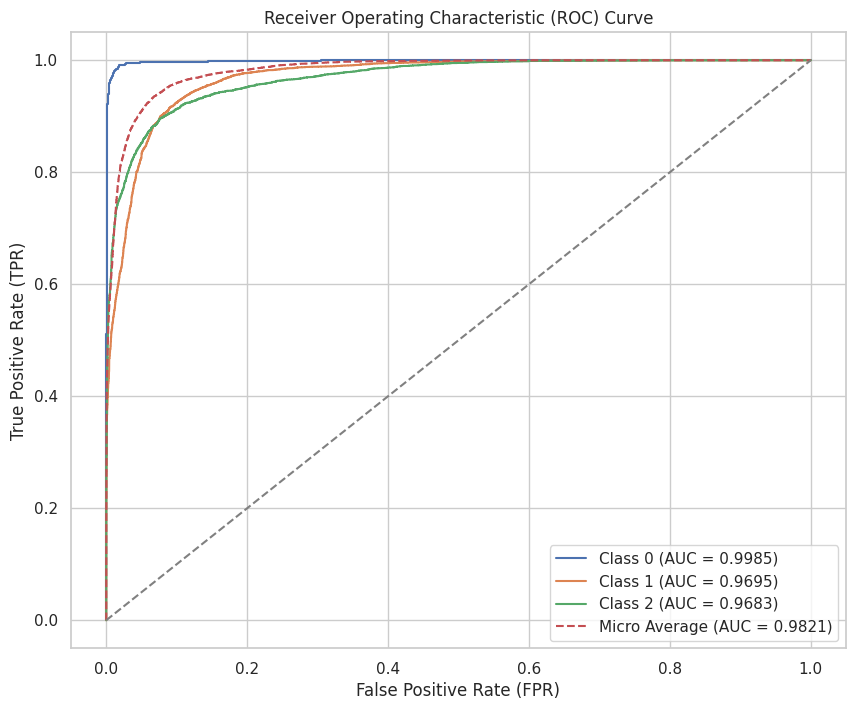

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Path ke model yang sudah dilatih
model_path = '/content/drive/MyDrive/Kaggle/best_model_25_trial.h5'
model = tf.keras.models.load_model(model_path)

# Fungsi untuk memuat dan memproses gambar
def load_and_preprocess_image(image_path, img_size=(256, 256)):
    img = image.load_img(image_path, target_size=img_size)
    img_array = image.img_to_array(img) / 255.0  # Normalisasi gambar
    return img_array

# Mengonversi gambar dari DataFrame
X_images = np.array([load_and_preprocess_image(img_path) for img_path in df['Image_Path']])
y_labels = df['Label'].values  # Label dari DataFrame

# Melakukan prediksi dengan model
y_pred_prob = model.predict(X_images)

# Menghitung AUC per kelas
auc_per_class = []
for i in range(3):  # Ada 3 kelas: Normal, Benign, Malignant
    auc_class = roc_auc_score(y_labels == i, y_pred_prob[:, i])
    auc_per_class.append(auc_class)
    print(f"AUC for class {i}: {auc_class:.4f}")

# Menghitung AUC micro average
micro_auc = roc_auc_score(y_labels, y_pred_prob, multi_class='ovr', average='micro')
print(f"\nAUC (Micro Average): {micro_auc:.4f}")

# Menghitung prediksi kelas dengan model (bukan probabilitas)
y_pred = np.argmax(y_pred_prob, axis=1)

# Menghasilkan classification report
report = classification_report(y_labels, y_pred, target_names=['Normal', 'Benign', 'Malignant'])
print("\nClassification Report:")
print(report)

# Binarize the labels for ROC curve computation
y_labels_binarized = label_binarize(y_labels, classes=[0, 1, 2])

# Menggambar ROC Curve
plt.figure(figsize=(10, 8))

# Plot ROC curve untuk masing-masing kelas
for i in range(3):  # 3 kelas
    fpr, tpr, _ = roc_curve(y_labels_binarized[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.4f})')

# Plot ROC curve micro average
fpr_micro, tpr_micro, _ = roc_curve(y_labels_binarized.ravel(), y_pred_prob.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)
plt.plot(fpr_micro, tpr_micro, label=f'Micro Average (AUC = {roc_auc_micro:.4f})', linestyle='--')

# Plot diagonal (chance line)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Customize plot
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(True)

# Show plot
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Path ke model yang sudah dilatih
model_path = '/content/drive/MyDrive/Kaggle/best_model_25_trial.h5'
model = tf.keras.models.load_model(model_path)

# Fungsi untuk memuat dan memproses gambar
def load_and_preprocess_image(image_path, img_size=(256, 256)):
    img = image.load_img(image_path, target_size=img_size)
    img_array = image.img_to_array(img) / 255.0  # Normalisasi gambar
    return img_array

# Mengonversi gambar dari DataFrame
X_images = np.array([load_and_preprocess_image(img_path) for img_path in df['Image_Path']])
y_labels = df['Label'].values  # Label dari DataFrame

# Melakukan prediksi dengan model
y_pred_prob = model.predict(X_images)

# Binarize the labels for ROC curve computation
y_labels_binarized = label_binarize(y_labels, classes=[0, 1, 2])

# Fungsi untuk mendapatkan titik ROC curve dalam DataFrame
def get_roc_curve_data(y_labels_binarized, y_pred_prob, num_partitions=20):
    roc_data = []

    for i in range(3):  # Ada 3 kelas: Normal, Benign, Malignant
        # Menghitung ROC curve untuk setiap kelas
        fpr, tpr, thresholds = roc_curve(y_labels_binarized[:, i], y_pred_prob[:, i])

        # Menyimpan titik ROC curve dalam 20 partisi
        partition_fpr = np.linspace(0, 1, num_partitions)
        partition_tpr = np.interp(partition_fpr, fpr, tpr)

        # Menyimpan hasilnya dalam DataFrame
        for f, t in zip(partition_fpr, partition_tpr):
            roc_data.append({
                'Class': i,
                'FPR': f,
                'TPR': t
            })

    # Membuat DataFrame dari data ROC
    roc_df = pd.DataFrame(roc_data)
    return roc_df

# Mendapatkan data ROC untuk semua kelas dan partisi
roc_df = get_roc_curve_data(y_labels_binarized, y_pred_prob, num_partitions=20)

# Tampilkan DataFrame dengan titik ROC
print(roc_df)

# Simpan DataFrame ke dalam file Excel
roc_df.to_excel("roc_curve_partitions.xlsx", index=False)



355/355 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step
    Class       FPR       TPR
0       0  0.000000  0.383641
1       0  0.052632  0.997120
2       0  0.105263  0.997696
3       0  0.157895  0.998848
4       0  0.210526  0.999424
5       0  0.263158  0.999424
6       0  0.315789  1.000000
7       0  0.368421  1.000000
8       0  0.421053  1.000000
9       0  0.473684  1.000000
10      0  0.526316  1.000000
11      0  0.578947  1.000000
12      0  0.631579  1.000000
13      0  0.684211  1.000000
14      0  0.736842  1.000000
15      0  0.789474  1.000000
16      0  0.842105  1.000000
17      0  0.894737  1.000000
18      0  0.947368  1.000000
19      0  1.000000  1.000000
20      1  0.000000  0.133200
21      1  0.052632  0.840000
22      1  0.105263  0.929800
23      1  0.157895  0.960800
24      1  0.210526  0.979000
25      1  0.263158  0.985800
26      1  0.315789  0.989000
27      1  0.368421  0.992800
28      1  0.421053  0.995400
29      1  0.473684  0.997000
30      1  0.526316  0.9980

# filter 84

In [ ]:
# Path to the model
model_path = '/content/drive/MyDrive/Kaggle/best_model_25_trial.h5'

# Load the saved model
activation_model = tf.keras.models.load_model(model_path)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Input

# Load model dari file .h5
model_path = '/content/drive/MyDrive/Kaggle/best_model_25_trial.h5'
model = load_model(model_path)

# Coba dapatkan input shape dari model secara umum jika ada
if hasattr(model, 'input_shape') and model.input_shape is not None:
    input_shape = model.input_shape[1:]  # tanpa batch dimension
elif hasattr(model.layers[0], 'batch_input_shape'):
    input_shape = model.layers[0].batch_input_shape[1:]
else:
    # Jika input shape tidak diketahui, definisikan manual sesuai data asli Anda
    input_shape = (256, 256, 3)  # Contoh input shape untuk image RGB 224x224

print("Input shape yang digunakan:", input_shape)

# Buat input layer baru
inputs = Input(shape=input_shape)

# Jalankan setiap layer model Sequential secara berurutan pada input baru ini
x = inputs
outputs = []
for layer in model.layers:
    x = layer(x)
    outputs.append(x)

# Buat model Functional baru dengan input dan output setiap layer
activation_model = Model(inputs=inputs, outputs=outputs)

# Buat input dummy
dummy_input = np.random.random((1,) + input_shape).astype(np.float32)

# Jalankan prediksi untuk mendapatkan output setiap layer
layer_outputs = activation_model.predict(dummy_input)

# Tampilkan output shape setiap layer
for i, output in enumerate(layer_outputs):
    print(f"Layer {i+1} ({model.layers[i].name}): output shape = {output.shape}")

# Opsional tampilkan input/output model baru
print("Model input tensor:", activation_model.input)
print("Model output tensors (list):", activation_model.output)


Input shape yang digunakan: (256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step
Layer 1 (conv2d_75): output shape = (1, 254, 254, 84)
Layer 2 (max_pooling2d_50): output shape = (1, 127, 127, 84)
Layer 3 (conv2d_76): output shape = (1, 125, 125, 84)
Layer 4 (max_pooling2d_51): output shape = (1, 62, 62, 84)
Layer 5 (conv2d_77): output shape = (1, 60, 60, 84)
Layer 6 (flatten_25): output shape = (1, 302400)
Layer 7 (dense_50): output shape = (1, 64)
Layer 8 (dense_51): output shape = (1, 3)
Model input tensor: <KerasTensor shape=(None, 256, 256, 3), dtype=float32, sparse=False, name=keras_tensor_1741>
Model output tensors (list): [<KerasTensor shape=(None, 254, 254, 84), dtype=float32, sparse=False, name=keras_tensor_1742>, <KerasTensor shape=(None, 127, 127, 84), dtype=float32, sparse=False, name=keras_tensor_1743>, <KerasTensor shape=(None, 125, 125, 84), dtype=float32, sparse=False, name=keras_tensor_1744>, <KerasTensor shape=(None, 62, 62, 84), dtype=float32, sparse=False, name=kera

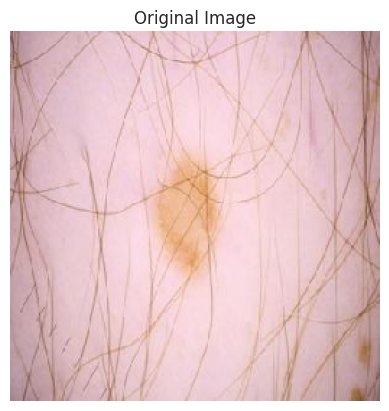

Matriks Gambar:
[[[163. 123. 121.]
  [129.  89.  87.]
  [186. 148. 147.]
  ...
  [170. 134. 138.]
  [172. 136. 140.]
  [170. 134. 138.]]

 [[169. 129. 127.]
  [134.  94.  92.]
  [185. 147. 146.]
  ...
  [174. 138. 142.]
  [175. 139. 143.]
  [174. 138. 142.]]

 [[171. 131. 129.]
  [140. 100.  98.]
  [183. 145. 144.]
  ...
  [175. 139. 143.]
  [175. 139. 143.]
  [174. 138. 142.]]

 ...

 [[160. 130. 140.]
  [160. 130. 140.]
  [162. 132. 142.]
  ...
  [150. 114. 118.]
  [133.  99. 100.]
  [140. 106. 107.]]

 [[162. 132. 142.]
  [162. 132. 142.]
  [163. 133. 141.]
  ...
  [150. 114. 118.]
  [133.  99. 100.]
  [140. 106. 107.]]

 [[163. 133. 143.]
  [163. 133. 143.]
  [163. 133. 141.]
  ...
  [150. 114. 118.]
  [132.  98.  99.]
  [139. 105. 106.]]]

Dimensi Gambar:
(256, 256, 3)

Top Left 3x3 Sub-Image :
[[163. 129. 186.]
 [169. 134. 185.]
 [171. 140. 183.]]

Top Right 3x3 Sub-Image :
[[170. 172. 170.]
 [174. 175. 174.]
 [175. 175. 174.]]

Bottom Left 3x3 Sub-Image :
[[160. 160. 162.]
 [162

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Path gambar asli
img_path ='/content/melanoma_cancer_dataset/train/benign/melanoma_1008.jpg'  # Ganti dengan path gambar yang sesuai

# Memuat gambar menggunakan Keras
img = image.load_img(img_path, target_size=(256, 256))  # Resize gambar jika perlu

# Mengonversi gambar menjadi array NumPy
img_array = image.img_to_array(img)  # Mengonversi gambar ke array

# Menampilkan gambar asli
plt.imshow(img)
plt.axis('off')  # Menyembunyikan axis
plt.title("Original Image")  # Judul gambar
plt.show()

# Menampilkan matriks gambar (array)
print("Matriks Gambar:")
print(img_array)

# Menampilkan dimensi gambar
print("\nDimensi Gambar:")
print(img_array.shape)

# Mengambil 3x3 dari bagian kiri atas, kanan atas, kiri bawah, dan kanan bawah
top_left = img_array[0:3, 0:3, 0]  # Kiri atas
top_right = img_array[0:3, -3:, 0]  # Kanan atas
bottom_left = img_array[-3:, 0:3,0]  # Kiri bawah
bottom_right = img_array[-3:, -3:, 0]  # Kanan bawah

# Menampilkan bagian-bagian gambar yang diambil
print("\nTop Left 3x3 Sub-Image :")
print(top_left)

print("\nTop Right 3x3 Sub-Image :")
print(top_right)

print("\nBottom Left 3x3 Sub-Image :")
print(bottom_left)

print("\nBottom Right 3x3 Sub-Image :")
print(bottom_right)

# Menormalisasi 3x3 bagian gambar ke rentang [0, 1]
top_left_normalized = top_left / 255.0
top_right_normalized = top_right / 255.0
bottom_left_normalized = bottom_left / 255.0
bottom_right_normalized = bottom_right / 255.0

# Menampilkan bagian-bagian gambar yang diambil
print("\nTop Left 3x3 Sub-Image (Normalized):")
print(top_left_normalized)

print("\nTop Right 3x3 Sub-Image (Normalized):")
print(top_right_normalized)

print("\nBottom Left 3x3 Sub-Image (Normalized):")
print(bottom_left_normalized)

print("\nBottom Right 3x3 Sub-Image (Normalized):")
print(bottom_right_normalized)


In [ ]:
pip install docx

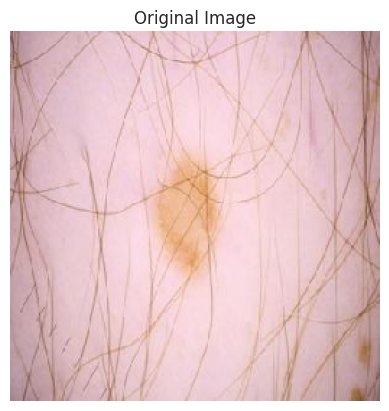

Matriks Gambar:
[[[163. 123. 121.]
  [129.  89.  87.]
  [186. 148. 147.]
  ...
  [170. 134. 138.]
  [172. 136. 140.]
  [170. 134. 138.]]

 [[169. 129. 127.]
  [134.  94.  92.]
  [185. 147. 146.]
  ...
  [174. 138. 142.]
  [175. 139. 143.]
  [174. 138. 142.]]

 [[171. 131. 129.]
  [140. 100.  98.]
  [183. 145. 144.]
  ...
  [175. 139. 143.]
  [175. 139. 143.]
  [174. 138. 142.]]

 ...

 [[160. 130. 140.]
  [160. 130. 140.]
  [162. 132. 142.]
  ...
  [150. 114. 118.]
  [133.  99. 100.]
  [140. 106. 107.]]

 [[162. 132. 142.]
  [162. 132. 142.]
  [163. 133. 141.]
  ...
  [150. 114. 118.]
  [133.  99. 100.]
  [140. 106. 107.]]

 [[163. 133. 143.]
  [163. 133. 143.]
  [163. 133. 141.]
  ...
  [150. 114. 118.]
  [132.  98.  99.]
  [139. 105. 106.]]]

Dimensi Gambar:
(256, 256, 3)
Color channels have been saved to color_channels_image.xlsx


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Path gambar asli
img_path = '/content/melanoma_cancer_dataset/train/benign/melanoma_1008.jpg'  # Ganti dengan path gambar yang sesuai

# Memuat gambar menggunakan Keras
img = image.load_img(img_path, target_size=(256, 256))  # Resize gambar jika perlu

# Mengonversi gambar menjadi array NumPy
img_array = image.img_to_array(img)  # Mengonversi gambar ke array

# Menampilkan gambar
plt.imshow(img)
plt.axis('off')  # Menyembunyikan axis
plt.title("Original Image")  # Judul gambar
plt.show()

# Menampilkan matriks gambar (array)
print("Matriks Gambar:")
print(img_array)

# Menampilkan dimensi gambar
print("\nDimensi Gambar:")
print(img_array.shape)

# Convert the image array to individual color channels
red_channel = img_array[:, :, 0]
green_channel = img_array[:, :, 1]
blue_channel = img_array[:, :, 2]

# Convert each channel to a DataFrame
df_red = pd.DataFrame(red_channel)
df_green = pd.DataFrame(green_channel)
df_blue = pd.DataFrame(blue_channel)

# Save the data to an Excel file with separate sheets for each color channel
output_path = 'color_channels_image.xlsx'

with pd.ExcelWriter(output_path) as writer:
    df_red.to_excel(writer, sheet_name='Red Channel', index=False, header=False)
    df_green.to_excel(writer, sheet_name='Green Channel', index=False, header=False)
    df_blue.to_excel(writer, sheet_name='Blue Channel', index=False, header=False)

print(f"Color channels have been saved to {output_path}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 948ms/step
Layer 1 (input_layer_16): output shape = (1, 254, 254, 84)
Layer 2 (conv2d_75): output shape = (1, 127, 127, 84)
Layer 3 (max_pooling2d_50): output shape = (1, 125, 125, 84)
Layer 4 (conv2d_76): output shape = (1, 62, 62, 84)
Layer 5 (max_pooling2d_51): output shape = (1, 60, 60, 84)
Layer 6 (conv2d_77): output shape = (1, 302400)
Layer 7 (flatten_25): output shape = (1, 64)
Layer 8 (dense_50): output shape = (1, 3)

Output Image Matrix (First Convolution):
[[[0.         0.01448081 0.         ... 0.         0.         0.09735056]
  [0.         0.04632654 0.         ... 0.         0.03220249 0.0767374 ]
  [0.         0.01102628 0.         ... 0.         0.         0.08189692]
  ...
  [0.         0.0229316  0.         ... 0.         0.         0.08805756]
  [0.         0.02884819 0.         ... 0.         0.         0.08898383]
  [0.         0.02566519 0.         ... 0.         0.         0.08859852]]

 [[0.         0.01876193 0.         ... 0.     

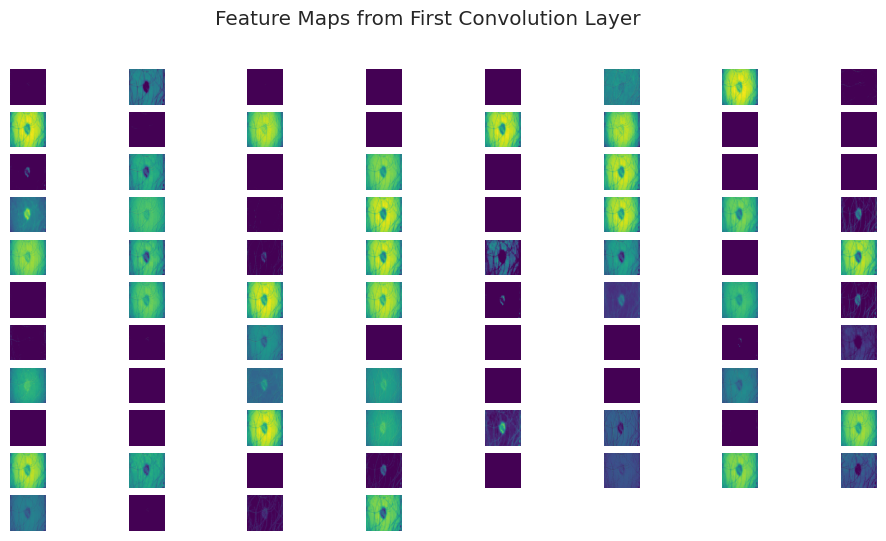


Output Image Matrix (First Max Pooling):
[[[0.         0.04632654 0.         ... 0.         0.03220249 0.10795602]
  [0.         0.03540773 0.         ... 0.         0.01108614 0.0881805 ]
  [0.         0.03781742 0.         ... 0.         0.00049469 0.11081121]
  ...
  [0.         0.04472267 0.         ... 0.         0.00386746 0.10460447]
  [0.         0.04002489 0.         ... 0.         0.01332614 0.09367552]
  [0.         0.02884819 0.         ... 0.         0.00115432 0.09181832]]

 [[0.         0.05248509 0.         ... 0.         0.01852144 0.10617441]
  [0.         0.03160161 0.         ... 0.         0.0154118  0.09443689]
  [0.         0.04793922 0.         ... 0.         0.00176753 0.10603872]
  ...
  [0.         0.05128188 0.         ... 0.         0.00951392 0.09476248]
  [0.         0.02982227 0.         ... 0.         0.00937786 0.08989977]
  [0.         0.02737271 0.         ... 0.         0.00313937 0.08622517]]

 [[0.         0.04967196 0.         ... 0.         0.0

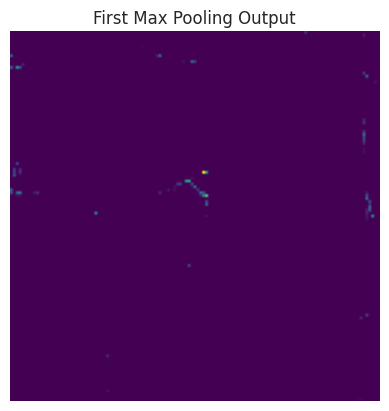


Output Image Matrix (Second Convolution):
[[[0.1517387  0.0201562  0.11638723 ... 0.01376448 0.02396736 0.        ]
  [0.14157854 0.01773464 0.1487896  ... 0.01326117 0.01752299 0.        ]
  [0.15090552 0.01842627 0.16221564 ... 0.00150043 0.02412939 0.        ]
  ...
  [0.13594183 0.0067402  0.1164519  ... 0.00888322 0.01628072 0.        ]
  [0.12868223 0.01571668 0.14902565 ... 0.01973893 0.0150058  0.        ]
  [0.13612516 0.00958178 0.14278609 ... 0.00458967 0.01768531 0.        ]]

 [[0.14802352 0.0285942  0.12201731 ... 0.0108692  0.03256477 0.        ]
  [0.14467245 0.01819422 0.1503945  ... 0.01486742 0.01762833 0.        ]
  [0.15246873 0.01913097 0.16170567 ... 0.00398167 0.02450206 0.        ]
  ...
  [0.14300688 0.0039578  0.10963856 ... 0.00172804 0.02381556 0.        ]
  [0.11477692 0.01100285 0.15600705 ... 0.02216304 0.0208859  0.        ]
  [0.14044361 0.01118269 0.13296719 ... 0.00842458 0.01196631 0.        ]]

 [[0.13760732 0.02602312 0.1142805  ... 0.014187   0.

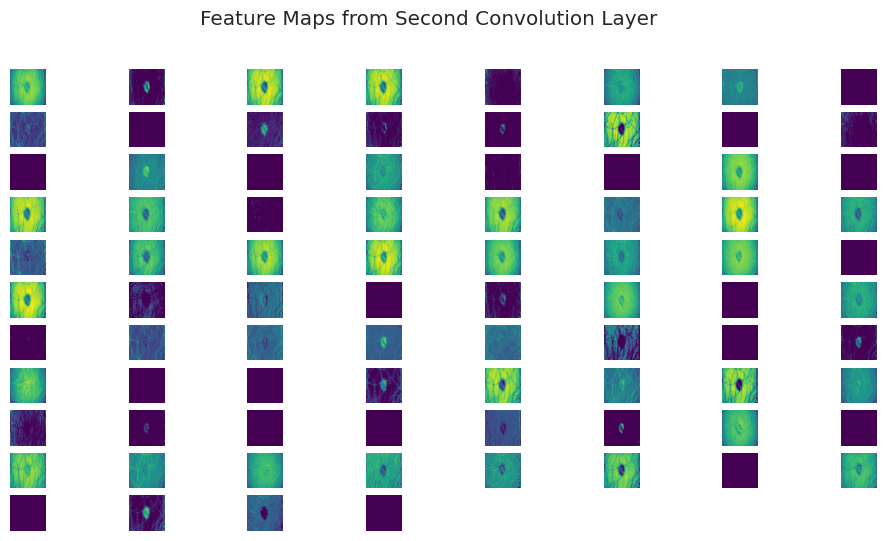


Output Image Matrix (Second Max Pooling):
[[[1.51738703e-01 2.85942033e-02 1.50394499e-01 ... 1.48674203e-02
   3.25647742e-02 0.00000000e+00]
  [1.52468726e-01 1.91309676e-02 1.77149832e-01 ... 6.79914234e-03
   2.45020632e-02 0.00000000e+00]
  [1.54485241e-01 1.18655665e-02 1.92886233e-01 ... 1.68618001e-03
   2.46478226e-02 0.00000000e+00]
  ...
  [1.41792372e-01 2.54948158e-03 1.88355401e-01 ... 1.69299673e-02
   2.22625341e-02 0.00000000e+00]
  [1.26066625e-01 2.53188312e-02 1.52815744e-01 ... 3.28088291e-02
   3.92501801e-02 0.00000000e+00]
  [1.43006876e-01 1.57166850e-02 1.56007051e-01 ... 2.21630391e-02
   2.38155611e-02 0.00000000e+00]]

 [[1.41844332e-01 2.60231197e-02 1.48341805e-01 ... 2.34467592e-02
   4.45249416e-02 0.00000000e+00]
  [1.54048100e-01 1.71432979e-02 1.80158362e-01 ... 5.75359631e-03
   2.45915726e-02 0.00000000e+00]
  [1.57222629e-01 1.21053495e-02 1.94322035e-01 ... 2.14683777e-03
   2.31403504e-02 0.00000000e+00]
  ...
  [1.43493265e-01 3.17015778e-03 1

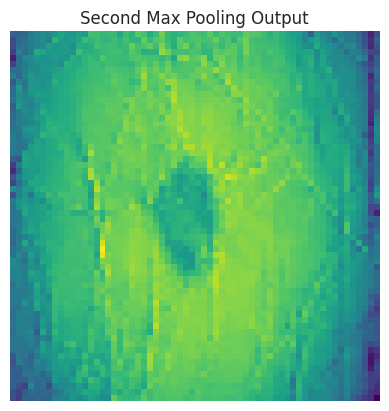


Output Image Matrix (Third Convolution):
[[[0.03054025 0.049682   0.07196583 ... 0.01040848 0.02381003 0.        ]
  [0.04071914 0.03555226 0.08692527 ... 0.00409519 0.02965775 0.0001888 ]
  [0.03928144 0.03155569 0.09588832 ... 0.00517377 0.03350066 0.00129505]
  ...
  [0.04331178 0.01975309 0.08938137 ... 0.01224245 0.02831367 0.        ]
  [0.04070603 0.01687569 0.07281666 ... 0.0297893  0.0179063  0.        ]
  [0.03178811 0.03718767 0.06042239 ... 0.0187425  0.02167571 0.        ]]

 [[0.02410633 0.0503789  0.06810487 ... 0.01634519 0.01952888 0.00759427]
  [0.03922466 0.03731985 0.0825     ... 0.00149876 0.03131358 0.        ]
  [0.03669401 0.03204476 0.08829477 ... 0.00279358 0.03065813 0.00206383]
  ...
  [0.0439525  0.01969174 0.08466015 ... 0.01239438 0.03030671 0.        ]
  [0.03760714 0.01977186 0.07018182 ... 0.03104623 0.01867266 0.        ]
  [0.02507594 0.04471172 0.06940185 ... 0.02145958 0.01370458 0.0012569 ]]

 [[0.01802391 0.05463704 0.06234299 ... 0.01865778 0.0

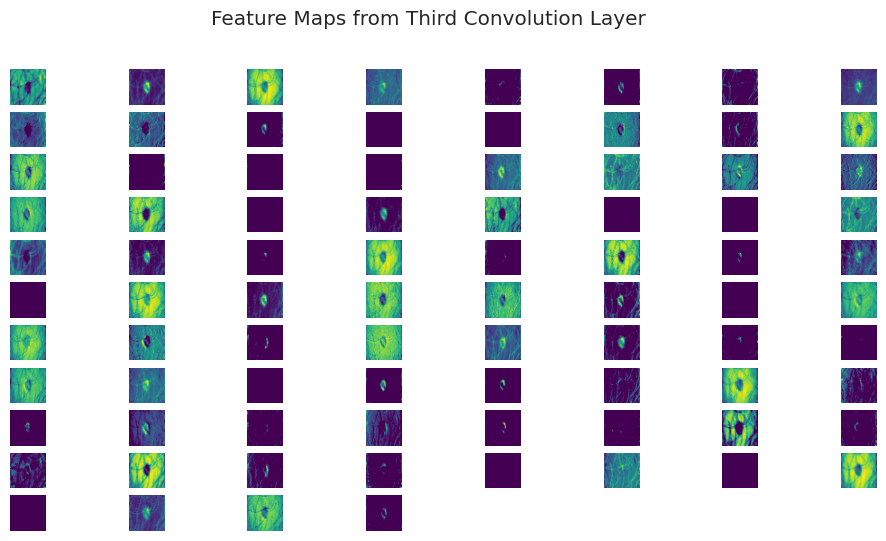


Flattened Image Matrix (1D):
[0.03054025 0.049682   0.07196583 0.01581836 0.         0.
 0.         0.02416661 0.01326249 0.01613819 0.         0.
 0.         0.02515326 0.         0.02585643 0.         0.
 0.         0.        ]

Output after Dense Layer (before Softmax):
[1.8721802  2.6016905  0.48721084 3.2535362  0.         0.
 0.         0.         0.         1.452503   2.3337512  0.
 0.         0.31537643 0.         0.         0.         0.
 7.1551423  0.         0.17354657 0.         3.3561792  0.
 0.         0.         0.9505789  1.2330841  4.421105   3.7226815
 0.         0.         3.3924673  0.         0.         0.01362673
 3.1690705  0.         0.         3.3917532  0.         3.0775127
 1.2835842  0.         0.         2.89275    5.8401713  0.
 0.99567413 0.         1.2247945  0.         0.         0.
 4.2232676  0.         0.         3.928786   0.         0.
 0.         4.835368   0.         0.        ]


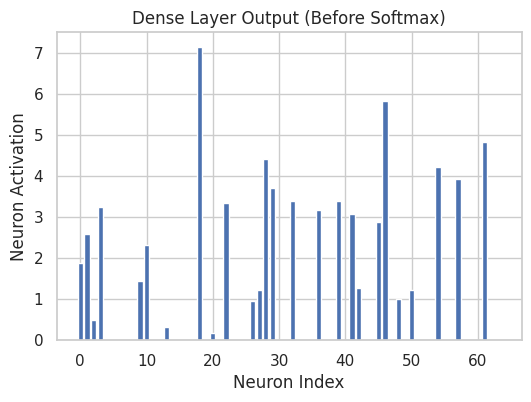


Final Output after Softmax Layer:
[3.3339762e-04 9.9749053e-01 2.1759961e-03]


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Input

# Path gambar asli
img_path = '/content/melanoma_cancer_dataset/train/benign/melanoma_1008.jpg'  # Ganti dengan path gambar yang sesuai

# Load model yang sudah dilatih (pastikan model sudah diload dengan benar)
model_path = '/content/drive/MyDrive/Kaggle/best_model_25_trial.h5'
model = load_model(model_path)

# Membuat model untuk mengambil output dari setiap layer
inputs = Input(shape=(256, 256, 3))  # Sesuaikan dengan input shape
x = inputs
outputs = []

# Iterasi setiap layer model untuk menyimpan output
for layer in model.layers:
    x = layer(x)
    outputs.append(x)

# Membuat model untuk mendapatkan output dari setiap layer
activation_model = Model(inputs=inputs, outputs=outputs)

# Memuat gambar dan memprosesnya
img = image.load_img(img_path, target_size=(256, 256))  # Resize ke ukuran yang sesuai (misalnya 256x256)
img_array = image.img_to_array(img) / 255.0  # Normalisasi ke 0-1
input_img = np.expand_dims(img_array, axis=0)  # Tambahkan dimensi batch

# Dapatkan output layer-layer untuk gambar asli
real_layer_outputs = activation_model.predict(input_img)

# Tampilkan output shape dari setiap layer
for i, output in enumerate(real_layer_outputs):
    print(f"Layer {i+1} ({activation_model.layers[i].name}): output shape = {output.shape}")

# 2. Layer Konvolusi 1
conv1_output = real_layer_outputs[0]  # output dari layer konvolusi pertama
print("\nOutput Image Matrix (First Convolution):")
print(conv1_output[0])  # hanya batch pertama, tampilkan bentuk 3D

# Menyesuaikan jumlah subplot jika ada lebih dari 32 channel
num_channels = conv1_output.shape[-1]  # Jumlah filter atau channel dalam layer konvolusi pertama
cols = 8  # Tentukan jumlah kolom
rows = (num_channels // cols) + (1 if num_channels % cols != 0 else 0)  # Menentukan jumlah baris yang dibutuhkan

# Visualisasi feature map dari layer konvolusi pertama
plt.figure(figsize=(12, 6))
for i in range(num_channels):  # Menampilkan setiap channel (filter)
    plt.subplot(rows, cols, i + 1)  # Atur subplot sesuai jumlah baris dan kolom
    plt.imshow(conv1_output[0, :, :, i], cmap='viridis')  # Menampilkan setiap channel filter
    plt.axis('off')
plt.suptitle("Feature Maps from First Convolution Layer")
plt.show()

# 3. MaxPooling Layer 1
maxpool1_output = real_layer_outputs[1]  # output dari max pooling pertama
print("\nOutput Image Matrix (First Max Pooling):")
print(maxpool1_output[0])  # hanya batch pertama, tampilkan bentuk 3D

# Visualisasi hasil max pooling pertama
plt.imshow(maxpool1_output[0, :, :, 0], cmap='viridis')  # Hanya channel pertama untuk visualisasi
plt.axis('off')
plt.title("First Max Pooling Output")
plt.show()

# 4. Layer Konvolusi 2
conv2_output = real_layer_outputs[2]  # output dari layer konvolusi kedua
print("\nOutput Image Matrix (Second Convolution):")
print(conv2_output[0])  # hanya batch pertama, tampilkan bentuk 3D

# Visualisasi feature map dari layer konvolusi kedua
plt.figure(figsize=(12, 6))
for i in range(conv2_output.shape[-1]):  # Menampilkan setiap channel (filter)
    plt.subplot(rows, cols, i + 1)  # Atur subplot
    plt.imshow(conv2_output[0, :, :, i], cmap='viridis')  # Menampilkan setiap channel filter
    plt.axis('off')
plt.suptitle("Feature Maps from Second Convolution Layer")
plt.show()

# 5. MaxPooling Layer 2
maxpool2_output = real_layer_outputs[3]  # output dari max pooling kedua
print("\nOutput Image Matrix (Second Max Pooling):")
print(maxpool2_output[0])  # hanya batch pertama, tampilkan bentuk 3D

# Visualisasi hasil max pooling kedua
plt.imshow(maxpool2_output[0, :, :, 0], cmap='viridis')  # Hanya channel pertama untuk visualisasi
plt.axis('off')
plt.title("Second Max Pooling Output")
plt.show()

# 6. Layer Konvolusi 3
conv3_output = real_layer_outputs[4]  # output dari layer konvolusi ketiga
print("\nOutput Image Matrix (Third Convolution):")
print(conv3_output[0])  # hanya batch pertama, tampilkan bentuk 3D

# Visualisasi feature map dari layer konvolusi ketiga
plt.figure(figsize=(12, 6))
for i in range(conv3_output.shape[-1]):  # Menampilkan setiap channel (filter)
    plt.subplot(rows, cols, i + 1)  # Atur subplot
    plt.imshow(conv3_output[0, :, :, i], cmap='viridis')  # Menampilkan setiap channel filter
    plt.axis('off')
plt.suptitle("Feature Maps from Third Convolution Layer")
plt.show()

# 7. Flatten Layer
flattened_output = conv3_output[0].flatten()  # Flatten hasil dari maxpool kedua
print("\nFlattened Image Matrix (1D):")
print(flattened_output[:20])  # tampilkan 20 elemen pertama sebagai contoh

# 8. Dense Layer (sebelum Softmax)
# Dense Layer output sebelum Softmax
dense_layer_output = real_layer_outputs[-2]  # Output dari layer Dense terakhir sebelum Softmax
print("\nOutput after Dense Layer (before Softmax):")
print(dense_layer_output[0])  # Menampilkan output sebelum Softmax (hanya batch pertama)

# Visualisasi output Dense Layer sebelum Softmax
plt.figure(figsize=(6, 4))
plt.bar(range(len(dense_layer_output[0])), dense_layer_output[0])
plt.title("Dense Layer Output (Before Softmax)")
plt.xlabel("Neuron Index")
plt.ylabel("Neuron Activation")
plt.show()

# 9. Output Layer
# Softmax Layer (langsung setelah Dense Layer sebagai output final)
softmax_output = real_layer_outputs[-1]  # Output akhir setelah Softmax
print("\nFinal Output after Softmax Layer:")
print(softmax_output[0])  # Menampilkan output final setelah Softmax (hanya batch pertama)


# New Section

# convolution layer


In [ ]:
# Pilih output batch pertama dan channel pertama
conv1_output_first_image = conv1_output[0, :, :, 0]  # batch pertama, channel pertama

# Tampilkan matriks output untuk channel pertama dari batch pertama (dimensi 254x254)
print(conv1_output_first_image.shape)  # Akan mencetak (254, 254)
print(conv1_output_first_image)  # Menampilkan matriks 254x254


(254, 254)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
# 2. Layer Konvolusi 1
conv1_output = real_layer_outputs[0]  # output dari layer konvolusi pertama
print("\nOutput Image Matrix (First Convolution):")
print(conv1_output[0, :, :].shape)


Output Image Matrix (First Convolution):
(254, 254, 84)


In [ ]:
# Mengakses lapisan konvolusi pertama dari model
kernel = model.layers[0]  # Biasanya lapisan pertama adalah Conv2D

# Mengambil bobot (filter) dan bias dari lapisan konvolusi
filters, biases = kernel.get_weights()

# Menampilkan dimensi dari matriks kernel (filter)
print("Shape of the filters: ", filters.shape)

# Menampilkan nilai dari filter pertama untuk setiap saluran (RGB)
first_filter_r = filters[:, :, 0, 0]  # Saluran Red (first filter)
first_filter_g = filters[:, :, 1, 0]  # Saluran Green (first filter)
first_filter_b = filters[:, :, 2, 0]  # Saluran Blue (first filter)

print("First filter (Red channel):")
print(first_filter_r)
print("\nFirst filter (Green channel):")
print(first_filter_g)
print("\nFirst filter (Blue channel):")
print(first_filter_b)

Shape of the filters:  (3, 3, 3, 84)
First filter (Red channel):
[[-0.03250067 -0.0303373   0.05751977]
 [-0.03028976 -0.00269418  0.00491557]
 [ 0.08768084  0.03733102  0.01286171]]

First filter (Green channel):
[[-0.07831664 -0.03087422 -0.07473425]
 [ 0.02367952 -0.05741458  0.03086852]
 [ 0.04064595  0.03762675  0.00796258]]

First filter (Blue channel):
[[ 0.02588169  0.00365753 -0.08569275]
 [-0.04657276  0.00734224 -0.04746556]
 [ 0.04382271  0.06135745 -0.06662717]]


In [ ]:
biases

array([ 7.67470803e-04,  2.08684430e-02,  1.14595843e-03,  1.48378378e-02,
        5.73966186e-03, -3.03547340e-03, -6.18146174e-03,  1.28809288e-02,
        2.35575018e-03, -5.23214403e-04, -9.25092772e-03,  3.88513505e-03,
        3.67946224e-03, -4.56259074e-03,  2.19659740e-03,  4.07111133e-03,
       -1.13836140e-03,  6.55984320e-03,  2.78351945e-04,  2.51383847e-03,
        9.62399470e-04,  2.68466305e-03,  3.49325128e-03,  9.17757582e-03,
       -3.34750512e-03,  4.21555759e-03,  1.23977317e-02, -8.03681463e-03,
        8.15251784e-04, -8.13642982e-03,  3.57760186e-03,  9.07818042e-03,
       -6.32425444e-03, -8.09686538e-03, -1.19765018e-05,  6.46988349e-03,
        6.53773593e-03,  6.91892067e-03, -3.70204588e-03,  2.51345988e-03,
        1.78527329e-02,  9.01159248e-04, -1.41973025e-03, -5.02362102e-03,
        4.00820136e-04,  5.37460530e-03, -2.97112507e-03, -1.13974803e-03,
        2.11059907e-03,  8.98548635e-04,  1.11318217e-03,  1.17725423e-02,
        2.92128650e-03,  

In [ ]:
for i in range(0,len(biases)) :
  print(biases[i])

0.0007674708
0.020868443
0.0011459584
0.014837838
0.005739662
-0.0030354734
-0.0061814617
0.012880929
0.0023557502
-0.0005232144
-0.009250928
0.003885135
0.0036794622
-0.0045625907
0.0021965974
0.0040711113
-0.0011383614
0.006559843
0.00027835194
0.0025138385
0.00096239947
0.002684663
0.0034932513
0.009177576
-0.0033475051
0.0042155576
0.012397732
-0.008036815
0.0008152518
-0.00813643
0.0035776019
0.00907818
-0.0063242544
-0.008096865
-1.1976502e-05
0.0064698835
0.006537736
0.0069189207
-0.003702046
0.00251346
0.017852733
0.00090115925
-0.0014197303
-0.005023621
0.00040082014
0.0053746053
-0.002971125
-0.001139748
0.002110599
0.00089854863
0.0011131822
0.011772542
0.0029212865
0.012152819
0.00070190954
0.01966359
0.005345959
0.009492374
0.004158726
0.0018262119
0.0131722875
0.008974981
0.012138273
0.0010683971
0.006778085
0.0033941187
-0.009454239
-0.0069749574
0.007084796
0.008334518
0.011020137
0.0022593723
-0.0024557747
0.008205795
0.009482115
-0.0013202459
0.006090665
0.004542483
0

In [ ]:
biases[83]

np.float32(0.007114028)

In [ ]:
# Mengakses lapisan konvolusi pertama
conv_layer = model.layers[0]  # Biasanya lapisan pertama adalah Conv2D

# Memeriksa nilai padding yang digunakan dalam lapisan konvolusi
padding_used = conv_layer.padding
print("Padding yang digunakan: ", padding_used)


Padding yang digunakan:  valid


In [ ]:
# Mengakses lapisan konvolusi pertama
conv_layer = model.layers[0]  # Biasanya lapisan pertama adalah Conv2D

# Memeriksa nilai stride yang digunakan dalam lapisan konvolusi
stride_used = conv_layer.strides
print("Stride yang digunakan: ", stride_used)


Stride yang digunakan:  (1, 1)


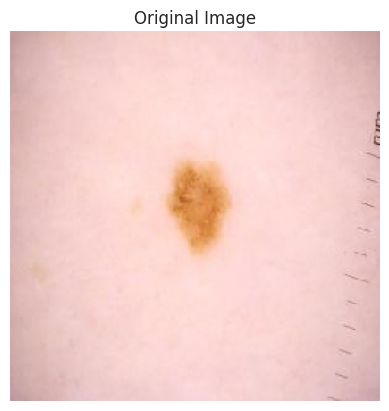

Image Matrix:
[[[0.7607843  0.6117647  0.60784316]
  [0.7607843  0.6117647  0.60784316]
  [0.7647059  0.6156863  0.6117647 ]
  ...
  [0.7764706  0.61960787 0.61960787]
  [0.77254903 0.6156863  0.6156863 ]
  [0.76862746 0.6117647  0.6117647 ]]

 [[0.7607843  0.6117647  0.60784316]
  [0.7607843  0.6117647  0.60784316]
  [0.7647059  0.6156863  0.6117647 ]
  ...
  [0.7764706  0.61960787 0.61960787]
  [0.77254903 0.6156863  0.6156863 ]
  [0.7647059  0.60784316 0.60784316]]

 [[0.7607843  0.6117647  0.60784316]
  [0.7607843  0.6117647  0.60784316]
  [0.7607843  0.6117647  0.60784316]
  ...
  [0.77254903 0.6156863  0.6156863 ]
  [0.76862746 0.6117647  0.6117647 ]
  [0.7647059  0.60784316 0.60784316]]

 ...

 [[0.7411765  0.59607846 0.62352943]
  [0.74509805 0.6        0.627451  ]
  [0.7490196  0.6039216  0.6313726 ]
  ...
  [0.7921569  0.6392157  0.65882355]
  [0.7882353  0.63529414 0.654902  ]
  [0.78431374 0.6313726  0.6509804 ]]

 [[0.7411765  0.59607846 0.62352943]
  [0.7411765  0.5960784

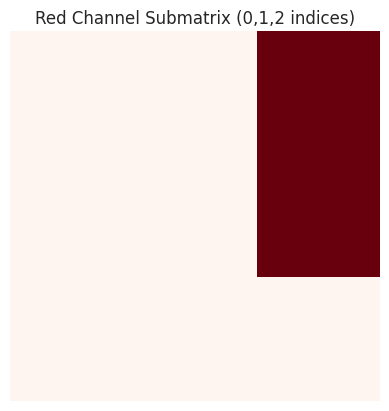

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Gantilah dengan path gambar yang sesuai
img_path = '/content/melanoma_cancer_dataset/train/benign/melanoma_0.jpg'  # Ambil gambar ke-2 dari DataFrame (sesuaikan dengan data Anda)

# Memuat gambar dan memprosesnya
img = image.load_img(img_path, target_size=(256, 256))  # Resize ke ukuran yang sesuai (misalnya 256x256)
img_array = image.img_to_array(img) / 255.0  # Normalisasi ke rentang [0, 1]
input_img = np.expand_dims(img_array, axis=0)  # Menambahkan dimensi batch (menjadi 4D tensor)

# Menampilkan gambar
plt.imshow(img)
plt.axis('off')  # Menyembunyikan axis
plt.title("Original Image")
plt.show()

# Menampilkan matriks gambar (array)
print("Image Matrix:")
print(img_array)

# Menampilkan dimensi gambar
print("\nImage Dimensions:")
print(input_img.shape)

# Mengambil saluran Red (R) dari gambar
red_channel = img_array[:, :, 0]  # Saluran Red ada di indeks ke-0

# Menampilkan matriks saluran Red secara keseluruhan
print("\nRed Channel Matrix:")
print(red_channel)

# Mengambil nilai elemen pada baris dan kolom 0, 1, 2 dari saluran Red
red_channel_submatrix = red_channel[0:3, 0:3]  # Menampilkan bagian 3x3 dari saluran Red

# Menampilkan sub-matriks (bagian) saluran Red
print("\nRed Channel Submatrix (0,1,2 indices):")
print(red_channel_submatrix)

# Menampilkan gambar sub-matriks saluran Red (3x3 pertama)
plt.imshow(red_channel_submatrix, cmap='Reds')  # Menampilkan saluran Red dengan colormap merah
plt.axis('off')
plt.title("Red Channel Submatrix (0,1,2 indices)")
plt.show()


In [ ]:
import pandas as pd

# Misalkan Anda telah mendapatkan output dari layer konvolusi pertama
# Gantilah 'conv1_output' dengan hasil model sebelumnya
conv1_output_first_image = conv1_output[0, :, :, 0]  # batch pertama, channel pertama

# Mengonversi matriks 254x254 ke DataFrame
conv1_df = pd.DataFrame(conv1_output_first_image)

# Menyimpan DataFrame ke Excel
excel_path = "/content/sample_data/conv1_output_first_image.xlsx"
conv1_df.to_excel(excel_path, index=False, header=False)

excel_path


'/content/sample_data/conv1_output_first_image.xlsx'

In [ ]:
biases

array([ 7.67470803e-04,  2.08684430e-02,  1.14595843e-03,  1.48378378e-02,
        5.73966186e-03, -3.03547340e-03, -6.18146174e-03,  1.28809288e-02,
        2.35575018e-03, -5.23214403e-04, -9.25092772e-03,  3.88513505e-03,
        3.67946224e-03, -4.56259074e-03,  2.19659740e-03,  4.07111133e-03,
       -1.13836140e-03,  6.55984320e-03,  2.78351945e-04,  2.51383847e-03,
        9.62399470e-04,  2.68466305e-03,  3.49325128e-03,  9.17757582e-03,
       -3.34750512e-03,  4.21555759e-03,  1.23977317e-02, -8.03681463e-03,
        8.15251784e-04, -8.13642982e-03,  3.57760186e-03,  9.07818042e-03,
       -6.32425444e-03, -8.09686538e-03, -1.19765018e-05,  6.46988349e-03,
        6.53773593e-03,  6.91892067e-03, -3.70204588e-03,  2.51345988e-03,
        1.78527329e-02,  9.01159248e-04, -1.41973025e-03, -5.02362102e-03,
        4.00820136e-04,  5.37460530e-03, -2.97112507e-03, -1.13974803e-03,
        2.11059907e-03,  8.98548635e-04,  1.11318217e-03,  1.17725423e-02,
        2.92128650e-03,  

In [ ]:
conv1_output_first_image

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

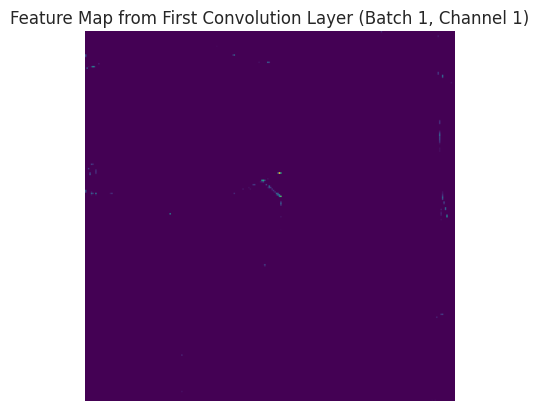

In [ ]:
# Visualisasi feature map untuk batch pertama dan channel pertama
plt.imshow(conv1_output_first_image, cmap='viridis')  # Menampilkan channel pertama
plt.axis('off')  # Matikan axis
plt.title("Feature Map from First Convolution Layer (Batch 1, Channel 1)")
plt.show()


In [ ]:
import pandas as pd

# Mengakses lapisan konvolusi pertama dari model
kernel = model.layers[0]  # Biasanya lapisan pertama adalah Conv2D

# Mengambil bobot (filter) dan bias dari lapisan konvolusi
filters, biases = kernel.get_weights()

# Menampilkan dimensi dari matriks kernel (filter)
print("Shape of the filters: ", filters.shape)

# Menampilkan nilai dari filter pertama untuk setiap saluran (RGB)
first_filter_r = filters[:, :, 0, 0]  # Saluran Red (first filter)
first_filter_g = filters[:, :, 1, 0]  # Saluran Green (first filter)
first_filter_b = filters[:, :, 2, 0]  # Saluran Blue (first filter)

# Menampilkan nilai filter untuk setiap saluran
print("First filter (Red channel):")
print(first_filter_r)
print("\nFirst filter (Green channel):")
print(first_filter_g)
print("\nFirst filter (Blue channel):")
print(first_filter_b)

# Mengonversi setiap filter menjadi DataFrame
df_r = pd.DataFrame(first_filter_r)
df_g = pd.DataFrame(first_filter_g)
df_b = pd.DataFrame(first_filter_b)

# Menyimpan filter ke Excel
with pd.ExcelWriter('/content/melanoma_cancer_dataset/first_filter_rgb.xlsx') as writer:
    df_r.to_excel(writer, sheet_name='Red Channel', index=False, header=False)
    df_g.to_excel(writer, sheet_name='Green Channel', index=False, header=False)
    df_b.to_excel(writer, sheet_name='Blue Channel', index=False, header=False)

print("Filter RGB pertama telah disimpan dalam file Excel.")


Shape of the filters:  (3, 3, 3, 84)
First filter (Red channel):
[[-0.03250067 -0.0303373   0.05751977]
 [-0.03028976 -0.00269418  0.00491557]
 [ 0.08768084  0.03733102  0.01286171]]

First filter (Green channel):
[[-0.07831664 -0.03087422 -0.07473425]
 [ 0.02367952 -0.05741458  0.03086852]
 [ 0.04064595  0.03762675  0.00796258]]

First filter (Blue channel):
[[ 0.02588169  0.00365753 -0.08569275]
 [-0.04657276  0.00734224 -0.04746556]
 [ 0.04382271  0.06135745 -0.06662717]]
Filter RGB pertama telah disimpan dalam file Excel.


In [ ]:
first_filter = filters[:, :, :, 0]

In [ ]:
first_filter

array([[[-0.03250067, -0.07831664,  0.02588169],
        [-0.0303373 , -0.03087422,  0.00365753],
        [ 0.05751977, -0.07473425, -0.08569275]],

       [[-0.03028976,  0.02367952, -0.04657276],
        [-0.00269418, -0.05741458,  0.00734224],
        [ 0.00491557,  0.03086852, -0.04746556]],

       [[ 0.08768084,  0.04064595,  0.04382271],
        [ 0.03733102,  0.03762675,  0.06135745],
        [ 0.01286171,  0.00796258, -0.06662717]]], dtype=float32)

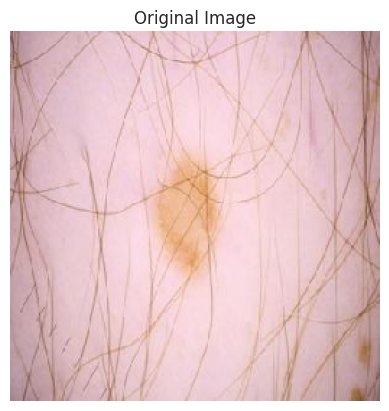

Matriks Gambar:
[[[163. 123. 121.]
  [129.  89.  87.]
  [186. 148. 147.]
  ...
  [170. 134. 138.]
  [172. 136. 140.]
  [170. 134. 138.]]

 [[169. 129. 127.]
  [134.  94.  92.]
  [185. 147. 146.]
  ...
  [174. 138. 142.]
  [175. 139. 143.]
  [174. 138. 142.]]

 [[171. 131. 129.]
  [140. 100.  98.]
  [183. 145. 144.]
  ...
  [175. 139. 143.]
  [175. 139. 143.]
  [174. 138. 142.]]

 ...

 [[160. 130. 140.]
  [160. 130. 140.]
  [162. 132. 142.]
  ...
  [150. 114. 118.]
  [133.  99. 100.]
  [140. 106. 107.]]

 [[162. 132. 142.]
  [162. 132. 142.]
  [163. 133. 141.]
  ...
  [150. 114. 118.]
  [133.  99. 100.]
  [140. 106. 107.]]

 [[163. 133. 143.]
  [163. 133. 143.]
  [163. 133. 141.]
  ...
  [150. 114. 118.]
  [132.  98.  99.]
  [139. 105. 106.]]]

Dimensi Gambar:
(256, 256, 3)

Top Left 3x3 Sub-Image :
[[[163. 123. 121.]
  [129.  89.  87.]
  [186. 148. 147.]]

 [[169. 129. 127.]
  [134.  94.  92.]
  [185. 147. 146.]]

 [[171. 131. 129.]
  [140. 100.  98.]
  [183. 145. 144.]]]

Top Right 3

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Path gambar asli
img_path = '/content/melanoma_cancer_dataset/train/benign/melanoma_1008.jpg'   # Ganti dengan path gambar yang sesuai

# Memuat gambar menggunakan Keras
img = image.load_img(img_path, target_size=(256, 256))  # Resize gambar jika perlu

# Mengonversi gambar menjadi array NumPy
img_array = image.img_to_array(img)  # Mengonversi gambar ke array

# Menampilkan gambar asli
plt.imshow(img)
plt.axis('off')  # Menyembunyikan axis
plt.title("Original Image")  # Judul gambar
plt.show()

# Menampilkan matriks gambar (array)
print("Matriks Gambar:")
print(img_array)

# Menampilkan dimensi gambar
print("\nDimensi Gambar:")
print(img_array.shape)

# Mengambil 3x3 dari bagian kiri atas, kanan atas, kiri bawah, dan kanan bawah
top_left = img_array[0:3, 0:3, :]  # Kiri atas
top_right = img_array[0:3, -3:, :]  # Kanan atas
bottom_left = img_array[-3:, 0:3, :]  # Kiri bawah
bottom_right = img_array[-3:, -3:, :]  # Kanan bawah

# Menampilkan bagian-bagian gambar yang diambil
print("\nTop Left 3x3 Sub-Image :")
print(top_left)

print("\nTop Right 3x3 Sub-Image :")
print(top_right)

print("\nBottom Left 3x3 Sub-Image :")
print(bottom_left)

print("\nBottom Right 3x3 Sub-Image :")
print(bottom_right)

# Menormalisasi 3x3 bagian gambar ke rentang [0, 1]
top_left_normalized = top_left / 255.0
top_right_normalized = top_right / 255.0
bottom_left_normalized = bottom_left / 255.0
bottom_right_normalized = bottom_right / 255.0

# Menampilkan bagian-bagian gambar yang diambil
print("\nTop Left 3x3 Sub-Image (Normalized):")
print(top_left_normalized)

print("\nTop Right 3x3 Sub-Image (Normalized):")
print(top_right_normalized)

print("\nBottom Left 3x3 Sub-Image (Normalized):")
print(bottom_left_normalized)

print("\nBottom Right 3x3 Sub-Image (Normalized):")
print(bottom_right_normalized)


In [ ]:
import numpy as np
indeks=0

# Bias untuk saluran merah (misalnya)
bias = biases[0]

# Fungsi ReLU
def relu(x):
    return np.maximum(0, x)

# Mengambil bagian gambar yang akan dihitung konvolusinya (3x3x3) di posisi (0, 0)
region = img_array/255  # Mengambil bagian 3x3 di bagian kiri atas gambar

# Menghitung konvolusi untuk Y(0, 0) dengan filter dan gambar
jumlah = 0
for i in range(3):  # Iterasi baris pada filter (3 baris)
    for j in range(3):  # Iterasi kolom pada filter (3 kolom)
        for c in range(3):  # Iterasi untuk saluran warna (R, G, B)
            a = region[i, j, c]  # Nilai gambar pada posisi [i, j, c] (saluran warna)
            b = first_filter[i, j, c]  # Nilai filter pada posisi [i, j, c]

            # Operasi perkalian dan penambahan bias
            result = a * b  # Operasi perkalian antara gambar dan filter

            # Menampilkan hasil perhitungan
            print(f"Perkalian: Gambar[{i},{j},{c}] = {a:.8f} * Filter[{i},{j},{c}] = {b:.8f} = {result:.8f}")
            print(f"Perkalian:  = {a:.8f} * {b:.8f} = {result:.8f}")
            indeks+=1
            print("Urutan :",indeks)
            jumlah += result  # Menambahkan hasil perkalian ke jumlah total

# Menambahkan bias setelah konvolusi
jumlah += bias

# Menambahkan aktivasi ReLU
output = (jumlah)

# Menampilkan hasil akhir konvolusi dengan bias dan ReLU
print("\nOutput konvolusi dengan bias dan ReLU pada Y(0,0,0):", output)


Perkalian: Gambar[0,0,0] = 0.63921571 * Filter[0,0,0] = -0.03250067 = -0.02077494
Perkalian:  = 0.63921571 * -0.03250067 = -0.02077494
Urutan : 1
Perkalian: Gambar[0,0,1] = 0.48235294 * Filter[0,0,1] = -0.07831664 = -0.03777627
Perkalian:  = 0.48235294 * -0.07831664 = -0.03777627
Urutan : 2
Perkalian: Gambar[0,0,2] = 0.47450981 * Filter[0,0,2] = 0.02588169 = 0.01228111
Perkalian:  = 0.47450981 * 0.02588169 = 0.01228111
Urutan : 3
Perkalian: Gambar[0,1,0] = 0.50588238 * Filter[0,1,0] = -0.03033730 = -0.01534711
Perkalian:  = 0.50588238 * -0.03033730 = -0.01534711
Urutan : 4
Perkalian: Gambar[0,1,1] = 0.34901962 * Filter[0,1,1] = -0.03087422 = -0.01077571
Perkalian:  = 0.34901962 * -0.03087422 = -0.01077571
Urutan : 5
Perkalian: Gambar[0,1,2] = 0.34117648 * Filter[0,1,2] = 0.00365753 = 0.00124786
Perkalian:  = 0.34117648 * 0.00365753 = 0.00124786
Urutan : 6
Perkalian: Gambar[0,2,0] = 0.72941178 * Filter[0,2,0] = 0.05751977 = 0.04195560
Perkalian:  = 0.72941178 * 0.05751977 = 0.04195560
U

#max pooling

In [ ]:
# 3. MaxPooling Layer 1
maxpool1_output = real_layer_outputs[1]  # output dari max pooling pertama
print("\nOutput Image Matrix (First Max Pooling):")
print(maxpool1_output[:,:,0])  # hanya batch pertama, tampilkan bentuk 3D



Output Image Matrix (First Max Pooling):
[[[0.         0.04632654 0.         ... 0.         0.03220249 0.10795602]
  [0.         0.05248509 0.         ... 0.         0.01852144 0.10617441]
  [0.         0.04967196 0.         ... 0.         0.01802002 0.10840054]
  ...
  [0.         0.04087538 0.         ... 0.         0.         0.11035202]
  [0.         0.04099907 0.         ... 0.         0.         0.11057314]
  [0.         0.0403485  0.         ... 0.         0.0008569  0.10639399]]]



Output Image Matrix (First Max Pooling, Channel 1):
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Shape of Channel 1 Output: (127, 127)


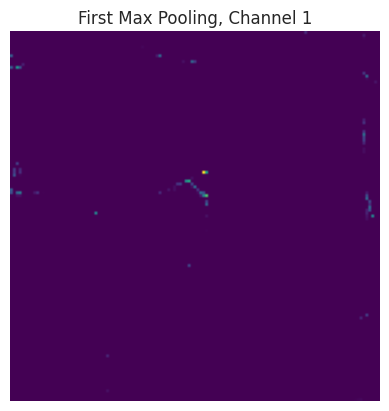

In [ ]:
# Max Pooling output - mengambil channel pertama dari batch pertama
maxpool1_output = real_layer_outputs[1]  # output dari max pooling pertama

# Mengambil channel pertama dari batch pertama
channel_1_output = maxpool1_output[0, :, :, 0]

# Menampilkan output dari channel pertama
print("\nOutput Image Matrix (First Max Pooling, Channel 1):")
print(channel_1_output)

# Menampilkan bentuk dari channel pertama
print("\nShape of Channel 1 Output:", channel_1_output.shape)

# Jika ingin menampilkan visualisasi dari channel pertama
plt.imshow(channel_1_output, cmap='viridis')
plt.axis('off')
plt.title("First Max Pooling, Channel 1")
plt.show()


In [ ]:
# 3. MaxPooling Layer 1
maxpool1_output = real_layer_outputs[1]  # output dari max pooling pertama
print("\nOutput Image Matrix (First Max Pooling):")
print(maxpool1_output[0,:,:,0])  # hanya batch pertama, tampilkan bentuk 3D



Output Image Matrix (First Max Pooling):
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
import pandas as pd
import numpy as np

# Assuming real_layer_outputs[1] is the output of the first max pooling layer
# Example shape of maxpool1_output: (1, 127, 127, 84)
maxpool1_output = real_layer_outputs[1]  # output from the first max-pooling layer

# Extracting the output for the first channel
channel_1_output = maxpool1_output[0, :, :, 0]  # Getting the first channel

# Convert the output to a 2D array
channel_1_output_flat = channel_1_output.reshape(-1, 1)  # Flattening the channel into a 2D format

# Create a DataFrame for the output
output_df = pd.DataFrame(channel_1_output_flat, columns=["Max Pooling Output"])

# Save the output to an Excel file
output_df.to_excel("maxpool1_output_channel1.xlsx", index=False)

# You can now download the file
print("Output saved to maxpool1_output_channel1.xlsx")


Output saved to maxpool1_output_channel1.xlsx


In [ ]:
maxpool1_output[0, :, :].shape

(127, 127, 84)

In [ ]:
# 2. Layer Konvolusi 1
conv1_output = real_layer_outputs[0]  # output dari layer konvolusi pertama
print("\nOutput Image Matrix (First Convolution):")
print(conv1_output[0])
print(conv1_output[0].shape)


Output Image Matrix (First Convolution):
[[[0.         0.01448081 0.         ... 0.         0.         0.09735056]
  [0.         0.04632654 0.         ... 0.         0.03220249 0.0767374 ]
  [0.         0.01102628 0.         ... 0.         0.         0.08189692]
  ...
  [0.         0.0229316  0.         ... 0.         0.         0.08805756]
  [0.         0.02884819 0.         ... 0.         0.         0.08898383]
  [0.         0.02566519 0.         ... 0.         0.         0.08859852]]

 [[0.         0.01876193 0.         ... 0.         0.         0.10795602]
  [0.         0.0449168  0.         ... 0.         0.02317197 0.08094325]
  [0.         0.01447227 0.         ... 0.         0.         0.0881805 ]
  ...
  [0.         0.02588831 0.         ... 0.         0.         0.08944537]
  [0.         0.02603834 0.         ... 0.         0.00115432 0.09002896]
  [0.         0.02108944 0.         ... 0.         0.         0.09181832]]

 [[0.         0.03663375 0.         ... 0.         0. 

In [ ]:
# Pilih output batch pertama dan channel pertama
conv1_output_first_image = conv1_output[0, :, :, 0]

# Menampilkan output batch pertama dan channel pertama
print("Output Image Matrix (First Convolution, Batch 0, Channel 0):")
print(conv1_output_first_image)
print(f"Shape: {conv1_output_first_image.shape}")


Output Image Matrix (First Convolution, Batch 0, Channel 0):
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Shape: (254, 254)


In [ ]:
# MaxPooling Layer 1
maxpool1_output = real_layer_outputs[1]  # output dari max pooling pertama

# Menampilkan output batch pertama dan dimensi dari maxpool1_output
print("\nOutput Image Matrix (First Max Pooling):")
print(maxpool1_output[0])  # hanya batch pertama, tampilkan bentuk 3D
print(f"Shape: {maxpool1_output[0].shape}")  # Menampilkan dimensi



Output Image Matrix (First Max Pooling):
[[[0.         0.04632654 0.         ... 0.         0.03220249 0.10795602]
  [0.         0.03540773 0.         ... 0.         0.01108614 0.0881805 ]
  [0.         0.03781742 0.         ... 0.         0.00049469 0.11081121]
  ...
  [0.         0.04472267 0.         ... 0.         0.00386746 0.10460447]
  [0.         0.04002489 0.         ... 0.         0.01332614 0.09367552]
  [0.         0.02884819 0.         ... 0.         0.00115432 0.09181832]]

 [[0.         0.05248509 0.         ... 0.         0.01852144 0.10617441]
  [0.         0.03160161 0.         ... 0.         0.0154118  0.09443689]
  [0.         0.04793922 0.         ... 0.         0.00176753 0.10603872]
  ...
  [0.         0.05128188 0.         ... 0.         0.00951392 0.09476248]
  [0.         0.02982227 0.         ... 0.         0.00937786 0.08989977]
  [0.         0.02737271 0.         ... 0.         0.00313937 0.08622517]]

 [[0.         0.04967196 0.         ... 0.         0.0

In [ ]:
import numpy as np

# Membuat input matriks 20x20 dengan angka acak 0-99
np.random.seed(0)  # agar hasil konsisten
input_matrix = np.random.randint(0, 100, size=(20, 20))

# Parameter max pooling
pool_size = (2, 2)  # ukuran window pooling 2x2
stride = (2, 2)  # stride pooling 2x2

# Menghitung dimensi output pooling
output_height = (input_matrix.shape[0] - pool_size[0]) // stride[0] + 1
output_width = (input_matrix.shape[1] - pool_size[1]) // stride[1] + 1

# Fungsi max pooling manual 2D
def max_pooling_2d(input_matrix, pool_size, stride):
    output = np.zeros((output_height, output_width))
    for i in range(output_height):
        for j in range(output_width):
            start_i = i * stride[0]
            start_j = j * stride[1]

            # Ambil window untuk proses pooling
            window = input_matrix[start_i:start_i+pool_size[0], start_j:start_j+pool_size[1]]
            max_val = np.max(window)
            output[i, j] = max_val
            print(f"Pooling window pos ({i},{j}):\n{window}\nMax: {max_val}\n")
    return output

# Cetak input matriks 20x20 penuh
print("Input matrix 20x20:")
print(input_matrix)

# Hitung dan print hasil max pooling
pooled_output = max_pooling_2d(input_matrix, pool_size, stride)

print("\nMax pooling output (dimensi 10x10):")
print(pooled_output)


Input matrix 20x20:
[[44 47 64 67 67  9 83 21 36 87 70 88 88 12 58 65 39 87 46 88]
 [81 37 25 77 72  9 20 80 69 79 47 64 82 99 88 49 29 19 19 14]
 [39 32 65  9 57 32 31 74 23 35 75 55 28 34  0  0 36 53  5 38]
 [17 79  4 42 58 31  1 65 41 57 35 11 46 82 91  0 14 99 53 12]
 [42 84 75 68  6 68 47  3 76 52 78 15 20 99 58 23 79 13 85 48]
 [49 69 41 35 64 95 69 94  0 50 36 34 48 93  3 98 42 77 21 73]
 [ 0 10 43 58 23 59  2 98 62 35 94 67 82 46 99 20 81 50 27 14]
 [41 58 65 36 10 86 43 11  2 51 80 32 54  0 38 19 46 42 56 60]
 [77 30 24  2  3 94 98 13 40 72 19 95 72 26 66 52 67 61 14 96]
 [ 4 67 11 86 77 75 56 16 24 29 21 25 80 60 61 83 33 32 70 85]
 [31 13 71 56 24 79 41 18 40 54 79 11 38 93  1 95 44 88 24 67]
 [82  3 76 35 86 61 69 87 43 32 11 84 10 54 37 28  2 27 83 89]
 [23 53 51 46 20 53 29 67 35 39  9 73 41 23  3 46 90 50  3 31]
 [ 9 10 27 45 71 39 61 85 97 44 34 34 88 33  5 36  0 75 34 69]
 [53 80 62  8 61  1 81 35 91 40 36 48 25 67 35 30 29 33 18 17]
 [93 84  2 69 12 44 66 91 85 39 39 

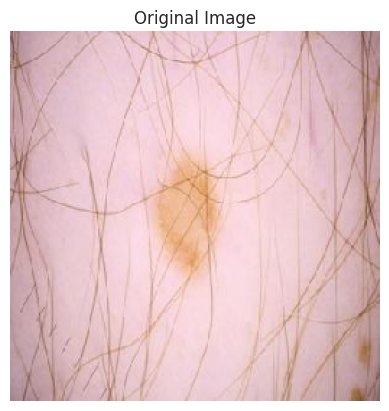

In [ ]:
# Mengonversi gambar menjadi array NumPy
img_array1 = image.img_to_array(img)/256  # Mengonversi gambar ke array

# Menampilkan gambar asli
plt.imshow(img)
plt.axis('off')  # Menyembunyikan axis
plt.title("Original Image")  # Judul gambar
plt.show()


#conv2

In [ ]:
# 2. Layer Konvolusi 1
conv1_output = real_layer_outputs[2]  # output dari layer konvolusi pertama
print("\nOutput Image Matrix (second):")
print(conv1_output[0])


Output Image Matrix (second):
[[[0.1517387  0.0201562  0.11638723 ... 0.01376448 0.02396736 0.        ]
  [0.14157854 0.01773464 0.1487896  ... 0.01326117 0.01752299 0.        ]
  [0.15090552 0.01842627 0.16221564 ... 0.00150043 0.02412939 0.        ]
  ...
  [0.13594183 0.0067402  0.1164519  ... 0.00888322 0.01628072 0.        ]
  [0.12868223 0.01571668 0.14902565 ... 0.01973893 0.0150058  0.        ]
  [0.13612516 0.00958178 0.14278609 ... 0.00458967 0.01768531 0.        ]]

 [[0.14802352 0.0285942  0.12201731 ... 0.0108692  0.03256477 0.        ]
  [0.14467245 0.01819422 0.1503945  ... 0.01486742 0.01762833 0.        ]
  [0.15246873 0.01913097 0.16170567 ... 0.00398167 0.02450206 0.        ]
  ...
  [0.14300688 0.0039578  0.10963856 ... 0.00172804 0.02381556 0.        ]
  [0.11477692 0.01100285 0.15600705 ... 0.02216304 0.0208859  0.        ]
  [0.14044361 0.01118269 0.13296719 ... 0.00842458 0.01196631 0.        ]]

 [[0.13760732 0.02602312 0.1142805  ... 0.014187   0.03913305 0. 

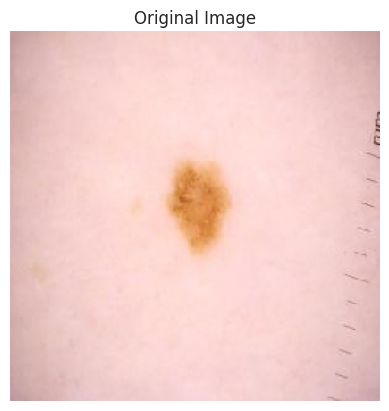

Matriks Gambar:
[[[[0.1517387  0.0201562  0.11638723 ... 0.01376448 0.02396736
    0.        ]
   [0.14157854 0.01773464 0.1487896  ... 0.01326117 0.01752299
    0.        ]
   [0.15090552 0.01842627 0.16221564 ... 0.00150043 0.02412939
    0.        ]
   ...
   [0.13594183 0.0067402  0.1164519  ... 0.00888322 0.01628072
    0.        ]
   [0.12868223 0.01571668 0.14902565 ... 0.01973893 0.0150058
    0.        ]
   [0.13612516 0.00958178 0.14278609 ... 0.00458967 0.01768531
    0.        ]]

  [[0.14802352 0.0285942  0.12201731 ... 0.0108692  0.03256477
    0.        ]
   [0.14467245 0.01819422 0.1503945  ... 0.01486742 0.01762833
    0.        ]
   [0.15246873 0.01913097 0.16170567 ... 0.00398167 0.02450206
    0.        ]
   ...
   [0.14300688 0.0039578  0.10963856 ... 0.00172804 0.02381556
    0.        ]
   [0.11477692 0.01100285 0.15600705 ... 0.02216304 0.0208859
    0.        ]
   [0.14044361 0.01118269 0.13296719 ... 0.00842458 0.01196631
    0.        ]]

  [[0.13760732 0.026

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Path gambar asli
img_path = '/content/melanoma_cancer_dataset/train/benign/melanoma_0.jpg'   # Ganti dengan path gambar yang sesuai

# Memuat gambar menggunakan Keras
img = image.load_img(img_path, target_size=(256, 256))  # Resize gambar jika perlu

# Mengonversi gambar menjadi array NumPy
img_array = real_layer_outputs[2] # Mengonversi gambar ke array

# Menampilkan gambar asli
plt.imshow(img)
plt.axis('off')  # Menyembunyikan axis
plt.title("Original Image")  # Judul gambar
plt.show()

# Menampilkan matriks gambar (array)
print("Matriks Gambar:")
print(img_array)

# Menampilkan dimensi gambar
print("\nDimensi Gambar:")
print(img_array.shape)

# Mengambil 3x3 dari bagian kiri atas, kanan atas, kiri bawah, dan kanan bawah
top_left = img_array[0:3, 0:3, :]  # Kiri atas
top_right = img_array[0:3, -3:, :]  # Kanan atas
bottom_left = img_array[-3:, 0:3, :]  # Kiri bawah
bottom_right = img_array[-3:, -3:, :]  # Kanan bawah

# Menampilkan bagian-bagian gambar yang diambil
print("\nTop Left 3x3 Sub-Image :")
print(top_left)

print("\nTop Right 3x3 Sub-Image :")
print(top_right)

print("\nBottom Left 3x3 Sub-Image :")
print(bottom_left)

print("\nBottom Right 3x3 Sub-Image :")
print(bottom_right)

# Menormalisasi 3x3 bagian gambar ke rentang [0, 1]
top_left_normalized = top_left / 255.0
top_right_normalized = top_right / 255.0
bottom_left_normalized = bottom_left / 255.0
bottom_right_normalized = bottom_right / 255.0

# Menampilkan bagian-bagian gambar yang diambil
print("\nTop Left 3x3 Sub-Image (Normalized):")
print(top_left_normalized)

print("\nTop Right 3x3 Sub-Image (Normalized):")
print(top_right_normalized)

print("\nBottom Left 3x3 Sub-Image (Normalized):")
print(bottom_left_normalized)

print("\nBottom Right 3x3 Sub-Image (Normalized):")
print(bottom_right_normalized)


In [ ]:
conv1_output = real_layer_outputs[1]

In [ ]:
# Mengakses lapisan konvolusi pertama dari model
kernel = model.layers[2]  # Biasanya lapisan pertama adalah Conv2D

# Mengambil bobot (filter) dan bias dari lapisan konvolusi
filters, biases = kernel.get_weights()

# Menampilkan dimensi dari matriks kernel (filter)
print("Shape of the filters: ", filters.shape)

# Menampilkan nilai dari filter pertama untuk setiap saluran (RGB)
first_filter_r = filters[:, :, 0, 0]  # Saluran Red (first filter)
first_filter_g = filters[:, :, 1, 0]  # Saluran Green (first filter)
first_filter_b = filters[:, :, 2, 0]  # Saluran Blue (first filter)

print("First filter (Red channel):")
print(first_filter_r)
print("\nFirst filter (Green channel):")
print(first_filter_g)
print("\nFirst filter (Blue channel):")
print(first_filter_b)

Shape of the filters:  (3, 3, 84, 84)
First filter (Red channel):
[[ 0.03918884  0.0567047   0.01804235]
 [ 0.04470294  0.06121789  0.0489814 ]
 [ 0.01616088 -0.01633515  0.00383021]]

First filter (Green channel):
[[ 0.0226804   0.03326117 -0.01899577]
 [ 0.04981615 -0.0306069  -0.05782522]
 [ 0.01785353  0.00408328 -0.00986428]]

First filter (Blue channel):
[[ 0.02788041 -0.05782472 -0.04941256]
 [-0.03251671  0.00879492  0.06328934]
 [ 0.03203554 -0.05841698  0.01375534]]


In [ ]:
model.layers[2].padding

'valid'

In [ ]:
model.layers[2].strides

(1, 1)

In [ ]:
biases[0]

np.float32(-0.0038674234)

In [ ]:
import numpy as np

indeks = 0

# Bias untuk saluran pertama (misalnya)
bias = biases[0]
# Ambil filter pertama (jika perlu, sesuaikan dengan filter yang dimaksud)
first_filter = filters[:, :, :, 0]

# Fungsi ReLU
def relu(x):
    return np.maximum(0, x)

# Mengambil bagian gambar yang akan dihitung konvolusinya (3x3x3) di posisi (0, 0)
region = conv1_output[0]  # Ambil bagian dari gambar pertama di batch

# Menghitung konvolusi untuk Y(0, 0) dengan filter dan gambar
jumlah = 0
for i in range(3):  # Iterasi baris pada filter (3 baris)
    for j in range(3):  # Iterasi kolom pada filter (3 kolom)
        for c in range(84):  # Iterasi untuk 84 saluran pada filter output
            a = region[i, j, c]  # Nilai gambar pada posisi [i, j, c] (saluran warna)
            b = first_filter[i, j, c]  # Nilai filter pada posisi [i, j, c]

            # Operasi perkalian dan penambahan bias
            result = a * b  # Operasi perkalian antara gambar dan filter

            # Menampilkan hasil perhitungan
            print(f"Perkalian: Gambar[{i},{j},{c}] = {a:.8f} * Filter[{i},{j},{c}] = {b:.8f} = {result:.8f}")
            indeks += 1
            print("Urutan:", indeks)
            jumlah += result  # Menambahkan hasil perkalian ke jumlah total

# Menambahkan bias setelah konvolusi
jumlah += bias

# Menambahkan aktivasi ReLU
output = relu(jumlah)

# Menampilkan hasil akhir konvolusi dengan bias dan ReLU
print("\nOutput konvolusi dengan bias dan ReLU pada Y(0,0,0):", output)


Perkalian: Gambar[0,0,0] = 0.00000000 * Filter[0,0,0] = 0.03918884 = 0.00000000
Urutan: 1
Perkalian: Gambar[0,0,1] = 0.04632654 * Filter[0,0,1] = 0.02268040 = 0.00105070
Urutan: 2
Perkalian: Gambar[0,0,2] = 0.00000000 * Filter[0,0,2] = 0.02788041 = 0.00000000
Urutan: 3
Perkalian: Gambar[0,0,3] = 0.00000000 * Filter[0,0,3] = 0.00872221 = 0.00000000
Urutan: 4
Perkalian: Gambar[0,0,4] = 0.00000000 * Filter[0,0,4] = -0.01781617 = -0.00000000
Urutan: 5
Perkalian: Gambar[0,0,5] = 0.05130881 * Filter[0,0,5] = 0.00051408 = 0.00002638
Urutan: 6
Perkalian: Gambar[0,0,6] = 0.18869379 * Filter[0,0,6] = -0.00002685 = -0.00000507
Urutan: 7
Perkalian: Gambar[0,0,7] = 0.00843916 * Filter[0,0,7] = 0.01909945 = 0.00016118
Urutan: 8
Perkalian: Gambar[0,0,8] = 0.37818563 * Filter[0,0,8] = 0.03164084 = 0.01196611
Urutan: 9
Perkalian: Gambar[0,0,9] = 0.00000000 * Filter[0,0,9] = -0.00075110 = -0.00000000
Urutan: 10
Perkalian: Gambar[0,0,10] = 0.20090596 * Filter[0,0,10] = -0.00882475 = -0.00177295
Urutan: 1

#maxpool 2

In [ ]:
# 3. MaxPooling Layer 1
maxpool1_output = real_layer_outputs[3]  # output dari max pooling pertama
print("\nOutput Image Matrix (First Max Pooling):")
print(maxpool1_output[:,:,0])  # hanya batch pertama, tampilkan bentuk 3D



Output Image Matrix (First Max Pooling):
[[[0.1517387  0.0285942  0.1503945  ... 0.01486742 0.03256477 0.        ]
  [0.14184433 0.02602312 0.1483418  ... 0.02344676 0.04452494 0.        ]
  [0.14168066 0.03013486 0.14636438 ... 0.02826401 0.04175412 0.        ]
  ...
  [0.15059726 0.00930392 0.18376473 ... 0.00435416 0.02458136 0.        ]
  [0.14392899 0.00687454 0.18118879 ... 0.00536292 0.02359253 0.        ]
  [0.14291336 0.0083838  0.18080465 ... 0.00607928 0.02313005 0.        ]]]


#flatten

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 569ms/step
Layer 1 (input_layer_17): output shape = (1, 254, 254, 84)
Layer 2 (conv2d_75): output shape = (1, 127, 127, 84)
Layer 3 (max_pooling2d_50): output shape = (1, 125, 125, 84)
Layer 4 (conv2d_76): output shape = (1, 62, 62, 84)
Layer 5 (max_pooling2d_51): output shape = (1, 60, 60, 84)
Layer 6 (conv2d_77): output shape = (1, 302400)
Layer 7 (flatten_25): output shape = (1, 64)
Layer 8 (dense_50): output shape = (1, 3)

Output Image Matrix (First Convolution):
[[[0.         0.04053618 0.         ... 0.         0.         0.11568996]
  [0.         0.04182331 0.         ... 0.         0.         0.11862416]
  [0.         0.04369539 0.         ... 0.         0.         0.12034219]
  ...
  [0.         0.04109372 0.         ... 0.         0.         0.12530752]
  [0.         0.04275722 0.         ... 0.         0.         0.12247441]
  [0.         0.03922175 0.         ... 0.         0.         0.12115287]]

 [[0.         0.03915815 0.         ... 0.     

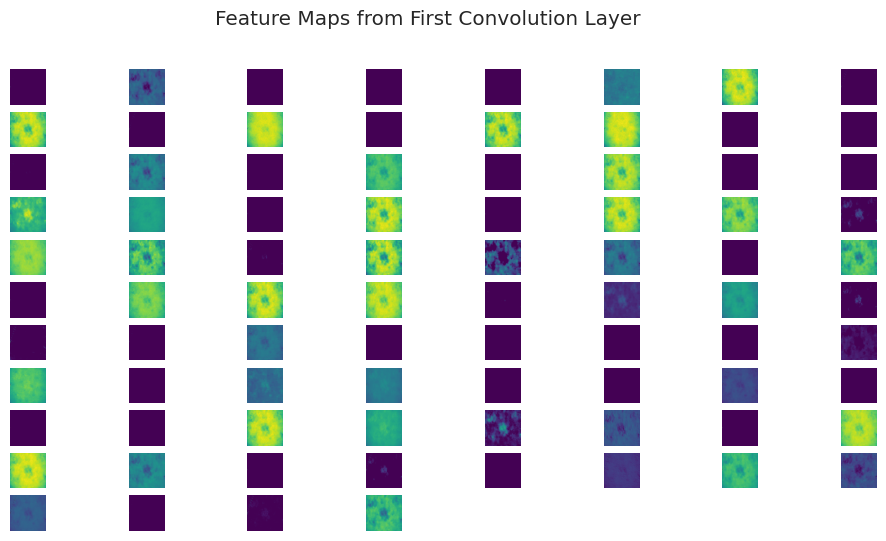


Output Image Matrix (First Max Pooling):
[[[0.         0.04293803 0.         ... 0.         0.         0.12275229]
  [0.         0.0470308  0.         ... 0.         0.         0.12322374]
  [0.         0.04708945 0.         ... 0.         0.00103423 0.1303894 ]
  ...
  [0.         0.04254068 0.         ... 0.         0.         0.12578827]
  [0.         0.04362674 0.         ... 0.         0.         0.12530752]
  [0.         0.04275722 0.         ... 0.         0.         0.12316792]]

 [[0.         0.04609913 0.         ... 0.         0.         0.12481483]
  [0.         0.04826207 0.         ... 0.         0.00056506 0.12969047]
  [0.         0.0450193  0.         ... 0.         0.         0.13014488]
  ...
  [0.         0.04301815 0.         ... 0.         0.         0.12781817]
  [0.         0.04216592 0.         ... 0.         0.         0.12788679]
  [0.         0.04183675 0.         ... 0.         0.         0.12390352]]

 [[0.         0.04384286 0.         ... 0.         0. 

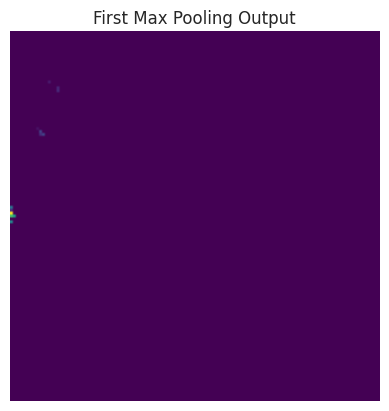


Output Image Matrix (Second Convolution):
[[[1.59299508e-01 1.42981941e-02 1.98057085e-01 ... 0.00000000e+00
   2.95530576e-02 0.00000000e+00]
  [1.66287526e-01 1.08113894e-02 2.00037047e-01 ... 0.00000000e+00
   2.68783234e-02 0.00000000e+00]
  [1.67696893e-01 7.95843825e-03 2.08203539e-01 ... 0.00000000e+00
   2.79869325e-02 0.00000000e+00]
  ...
  [1.57888725e-01 1.03615532e-02 2.02710629e-01 ... 3.04208836e-03
   2.49619056e-02 0.00000000e+00]
  [1.59704939e-01 1.02291172e-02 2.06592545e-01 ... 4.18470567e-03
   2.80599222e-02 0.00000000e+00]
  [1.60260946e-01 9.91255697e-03 2.02791452e-01 ... 1.77383050e-03
   2.55548283e-02 0.00000000e+00]]

 [[1.60233229e-01 1.22393165e-02 2.00944394e-01 ... 0.00000000e+00
   2.79336665e-02 0.00000000e+00]
  [1.64689809e-01 1.12414984e-02 2.04414129e-01 ... 0.00000000e+00
   2.86536925e-02 0.00000000e+00]
  [1.67455554e-01 9.08495020e-03 2.11285025e-01 ... 0.00000000e+00
   2.85335816e-02 0.00000000e+00]
  ...
  [1.59235477e-01 7.61626288e-03 2

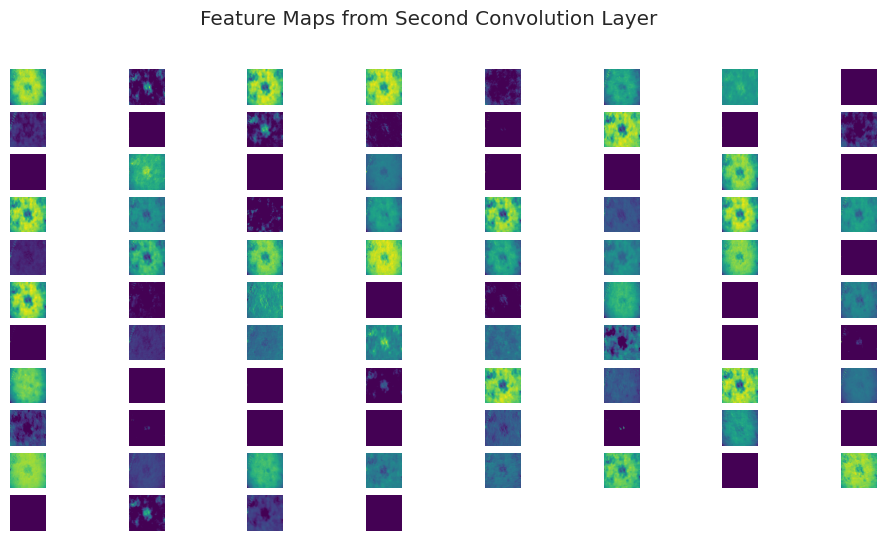


Output Image Matrix (Second Max Pooling):
[[[1.66287526e-01 1.42981941e-02 2.04414129e-01 ... 0.00000000e+00
   2.95530576e-02 0.00000000e+00]
  [1.70019582e-01 9.08495020e-03 2.12915167e-01 ... 0.00000000e+00
   2.85335816e-02 0.00000000e+00]
  [1.73090935e-01 7.62144011e-03 2.18669325e-01 ... 0.00000000e+00
   2.93669868e-02 0.00000000e+00]
  ...
  [1.66620582e-01 1.59936920e-02 2.01545358e-01 ... 8.16390198e-03
   1.99742187e-02 0.00000000e+00]
  [1.63632900e-01 1.17350398e-02 1.99911773e-01 ... 5.79391327e-03
   2.28957850e-02 0.00000000e+00]
  [1.59704939e-01 1.04700625e-02 2.06592545e-01 ... 4.18470567e-03
   2.80599222e-02 0.00000000e+00]]

 [[1.67469859e-01 1.35840429e-02 2.08239138e-01 ... 1.62153505e-04
   2.98902970e-02 0.00000000e+00]
  [1.70250371e-01 1.01118023e-02 2.13160634e-01 ... 0.00000000e+00
   2.86469664e-02 0.00000000e+00]
  [1.72958642e-01 5.72775630e-03 2.18197703e-01 ... 0.00000000e+00
   2.89177876e-02 0.00000000e+00]
  ...
  [1.68102428e-01 1.46590993e-02 2

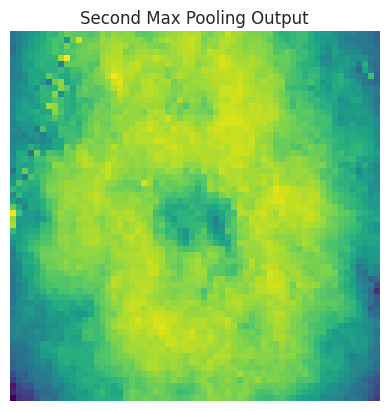


Output Image Matrix (Third Convolution):
[[[0.05594965 0.02613365 0.10254537 ... 0.00806075 0.0393652  0.        ]
  [0.05400735 0.02585523 0.10885641 ... 0.00721032 0.03766768 0.        ]
  [0.05234783 0.02734646 0.11121614 ... 0.00627185 0.04171603 0.        ]
  ...
  [0.06438048 0.0402574  0.10336943 ... 0.01338779 0.04439747 0.        ]
  [0.06061018 0.03527524 0.10240299 ... 0.01177233 0.04345693 0.        ]
  [0.060923   0.03295464 0.10133754 ... 0.01096759 0.03974611 0.        ]]

 [[0.0546138  0.02945592 0.10296821 ... 0.00811456 0.03806391 0.        ]
  [0.0528345  0.02708747 0.10882203 ... 0.00806623 0.03699662 0.        ]
  [0.04969438 0.02928677 0.11218341 ... 0.00768455 0.04085377 0.        ]
  ...
  [0.06261108 0.03333319 0.10267341 ... 0.01222005 0.04566946 0.        ]
  [0.0640238  0.03292953 0.10351685 ... 0.01128863 0.04603381 0.        ]
  [0.06167957 0.03013824 0.10144315 ... 0.01246527 0.03908863 0.        ]]

 [[0.05663967 0.03231082 0.10152542 ... 0.00872248 0.0

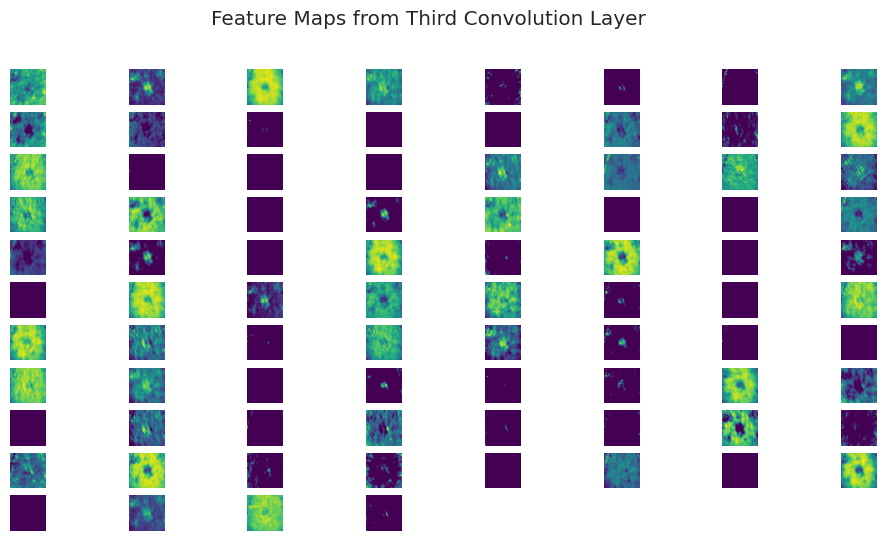


Flattened Image Matrix (1D):
[0.05594965 0.02613365 0.10254537 0.01991728 0.         0.
 0.         0.01759771 0.0235502  0.01110323 0.         0.
 0.         0.01986453 0.00011126 0.04537416 0.03143031 0.
 0.         0.        ]

Output after Dense Layer (before Softmax):
[[0.01494863 0.         0.         0.         0.         0.
  0.01892838 0.00611623 0.         0.         0.         0.
  0.06701869 0.06650864 0.         0.         0.0340864  0.00884905
  0.         0.         0.         0.04219886 0.         0.
  0.         0.02656515 0.         0.         0.11741479 0.
  0.02354684 0.         0.         0.         0.0527902  0.
  0.         0.00726635 0.         0.         0.04595234 0.
  0.         0.         0.00270901 0.         0.04214833 0.02848704
  0.         0.00522354 0.         0.04500222 0.01650205 0.02068867
  0.         0.         0.06347007 0.05004748 0.         0.00586196
  0.04967516 0.00593232 0.         0.00433697 0.03891898 0.
  0.         0.         0.       

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Input

# Path gambar asli
img_path = df['Image_Path'].iloc[2]  # Ganti dengan path gambar yang sesuai

# Load model yang sudah dilatih (pastikan model sudah diload dengan benar)
model_path = '/content/drive/MyDrive/Kaggle/best_model_25_trial.h5'
model = load_model(model_path)

# Membuat model untuk mengambil output dari setiap layer
inputs = Input(shape=(256, 256, 3))  # Sesuaikan dengan input shape
x = inputs
outputs = []

for layer in model.layers:
    x = layer(x)
    outputs.append(x)

activation_model = Model(inputs=inputs, outputs=outputs)

# Memuat gambar dan memprosesnya
img = image.load_img(img_path, target_size=(256, 256))  # Resize ke ukuran yang sesuai (misalnya 256x256)
img_array = image.img_to_array(img) / 255.0  # Normalisasi ke 0-1
input_img = np.expand_dims(img_array, axis=0)  # Tambahkan dimensi batch

# Dapatkan output layer-layer untuk gambar asli
real_layer_outputs = activation_model.predict(input_img)

# Tampilkan output shape dari setiap layer
for i, output in enumerate(real_layer_outputs):
    print(f"Layer {i+1} ({activation_model.layers[i].name}): output shape = {output.shape}")

# 2. Layer Konvolusi 1
conv1_output = real_layer_outputs[0]  # output dari layer konvolusi pertama
print("\nOutput Image Matrix (First Convolution):")
print(conv1_output[0])  # hanya batch pertama, tampilkan bentuk 3D

# Menyesuaikan jumlah subplot jika ada lebih dari 32 channel
num_channels = conv1_output.shape[-1]  # Jumlah filter atau channel dalam layer konvolusi pertama
cols = 8  # Tentukan jumlah kolom
rows = (num_channels // cols) + (1 if num_channels % cols != 0 else 0)  # Menentukan jumlah baris yang dibutuhkan

# Visualisasi feature map dari layer konvolusi pertama
plt.figure(figsize=(12, 6))
for i in range(num_channels):  # Menampilkan setiap channel (filter)
    plt.subplot(rows, cols, i + 1)  # Atur subplot sesuai jumlah baris dan kolom
    plt.imshow(conv1_output[0, :, :, i], cmap='viridis')  # Menampilkan setiap channel filter
    plt.axis('off')
plt.suptitle("Feature Maps from First Convolution Layer")
plt.show()

# 3. MaxPooling Layer 1
maxpool1_output = real_layer_outputs[1]  # output dari max pooling pertama
print("\nOutput Image Matrix (First Max Pooling):")
print(maxpool1_output[0])  # hanya batch pertama, tampilkan bentuk 3D

# Visualisasi hasil max pooling pertama
plt.imshow(maxpool1_output[0, :, :, 0], cmap='viridis')  # Hanya channel pertama untuk visualisasi
plt.axis('off')
plt.title("First Max Pooling Output")
plt.show()

# 4. Layer Konvolusi 2
conv2_output = real_layer_outputs[2]  # output dari layer konvolusi kedua
print("\nOutput Image Matrix (Second Convolution):")
print(conv2_output[0])  # hanya batch pertama, tampilkan bentuk 3D

# Visualisasi feature map dari layer konvolusi kedua
plt.figure(figsize=(12, 6))
for i in range(conv2_output.shape[-1]):  # Menampilkan setiap channel (filter)
    plt.subplot(rows, cols, i + 1)  # Atur subplot
    plt.imshow(conv2_output[0, :, :, i], cmap='viridis')  # Menampilkan setiap channel filter
    plt.axis('off')
plt.suptitle("Feature Maps from Second Convolution Layer")
plt.show()

# 5. MaxPooling Layer 2
maxpool2_output = real_layer_outputs[3]  # output dari max pooling kedua
print("\nOutput Image Matrix (Second Max Pooling):")
print(maxpool2_output[0])  # hanya batch pertama, tampilkan bentuk 3D

# Visualisasi hasil max pooling kedua
plt.imshow(maxpool2_output[0, :, :, 0], cmap='viridis')  # Hanya channel pertama untuk visualisasi
plt.axis('off')
plt.title("Second Max Pooling Output")
plt.show()

# 6. Layer Konvolusi 3
conv3_output = real_layer_outputs[4]  # output dari layer konvolusi ketiga
print("\nOutput Image Matrix (Third Convolution):")
print(conv3_output[0])  # hanya batch pertama, tampilkan bentuk 3D

# Visualisasi feature map dari layer konvolusi ketiga
plt.figure(figsize=(12, 6))
for i in range(conv3_output.shape[-1]):  # Menampilkan setiap channel (filter)
    plt.subplot(rows, cols, i + 1)  # Atur subplot
    plt.imshow(conv3_output[0, :, :, i], cmap='viridis')  # Menampilkan setiap channel filter
    plt.axis('off')
plt.suptitle("Feature Maps from Third Convolution Layer")
plt.show()

# 7. Flatten Layer
flattened_output = conv3_output[0].flatten()  # Flatten hasil dari maxpool kedua
print("\nFlattened Image Matrix (1D):")
print(flattened_output[:20])  # tampilkan 20 elemen pertama sebagai contoh

# 8. Layer Dense 1
# Asumsikan output flattened dari max pooling layer terakhir
flattened_input = np.expand_dims(flattened_output, axis=0)  # Tambahkan dimensi batch untuk input Dense

# Dense Layer (Fully Connected Layer)
dense_layer = tf.keras.layers.Dense(128, activation='relu')(flattened_input)  # 128 unit dan ReLU activation
print("\nOutput after Dense Layer (before Softmax):")
print(dense_layer.numpy())

# 9. Output Layer
# Softmax Layer (langsung setelah Dense Layer sebagai output final)
softmax_output = tf.keras.layers.Dense(3, activation='softmax')(dense_layer)  # 3 kelas output (ubah sesuai kebutuhan)
print("\nFinal Output after Softmax Layer:")
print(softmax_output.numpy())


In [ ]:
# 7. Flatten Layer
flattened_output = conv3_output[0].flatten()  # Flatten hasil dari maxpool kedua
print("\nFlattened Image Matrix (1D):")
print(flattened_output[:20])  # tampilkan 20 elemen pertama sebagai contoh



Flattened Image Matrix (1D):
[0.05594965 0.02613365 0.10254537 0.01991728 0.         0.
 0.         0.01759771 0.0235502  0.01110323 0.         0.
 0.         0.01986453 0.00011126 0.04537416 0.03143031 0.
 0.         0.        ]


In [ ]:
for i in range(20):
  print(flattened_output[i])

0.055949654
0.026133653
0.102545366
0.019917283
0.0
0.0
0.0
0.017597714
0.023550201
0.011103229
0.0
0.0
0.0
0.01986453
0.00011125626
0.045374162
0.031430308
0.0
0.0
0.0


#dense

In [ ]:
from tensorflow.keras.models import Model

# Misalnya activation_model adalah model yang telah Anda buat sebelumnya
# Loop untuk mengambil bobot dan bias dari setiap layer
for layer in activation_model.layers:
    if isinstance(layer, tf.keras.layers.Conv2D) or isinstance(layer, tf.keras.layers.Dense):
        weights, biases = layer.get_weights()  # Mendapatkan bobot dan bias
        print(f"Layer: {layer.name}")
        print(f"Weights shape: {weights.shape}")  # Menampilkan bentuk bobot
        print(f"Bias shape: {biases.shape}")  # Menampilkan bentuk bias
        print(f"Bias values: {biases}")  # Menampilkan nilai bias
        print(f"Weights values: {weights[:5]}")  # Menampilkan sebagian kecil bobot sebagai contoh
        print('-' * 50)


Layer: conv2d_75
Weights shape: (3, 3, 3, 84)
Bias shape: (84,)
Bias values: [ 7.67470803e-04  2.08684430e-02  1.14595843e-03  1.48378378e-02
  5.73966186e-03 -3.03547340e-03 -6.18146174e-03  1.28809288e-02
  2.35575018e-03 -5.23214403e-04 -9.25092772e-03  3.88513505e-03
  3.67946224e-03 -4.56259074e-03  2.19659740e-03  4.07111133e-03
 -1.13836140e-03  6.55984320e-03  2.78351945e-04  2.51383847e-03
  9.62399470e-04  2.68466305e-03  3.49325128e-03  9.17757582e-03
 -3.34750512e-03  4.21555759e-03  1.23977317e-02 -8.03681463e-03
  8.15251784e-04 -8.13642982e-03  3.57760186e-03  9.07818042e-03
 -6.32425444e-03 -8.09686538e-03 -1.19765018e-05  6.46988349e-03
  6.53773593e-03  6.91892067e-03 -3.70204588e-03  2.51345988e-03
  1.78527329e-02  9.01159248e-04 -1.41973025e-03 -5.02362102e-03
  4.00820136e-04  5.37460530e-03 -2.97112507e-03 -1.13974803e-03
  2.11059907e-03  8.98548635e-04  1.11318217e-03  1.17725423e-02
  2.92128650e-03  1.21528190e-02  7.01909536e-04  1.96635891e-02
  5.34595922e

In [ ]:
weights[:,0]

array([-0.17353247, -0.18729886,  0.18469834,  0.1794629 ,  0.09658358,
        0.21735854, -0.1071504 , -0.27677387,  0.23199153,  0.08078924,
        0.24606413,  0.28383532, -0.25320947,  0.12078305,  0.12741655,
       -0.19222851,  0.15406792, -0.22264485, -0.24447185, -0.00763187,
        0.03162417,  0.02730737, -0.17719065,  0.0064583 , -0.03619884,
        0.1040954 , -0.09306651,  0.21351735,  0.09018123, -0.27169845,
        0.04837   ,  0.23981704, -0.0893283 ,  0.14339219,  0.05104816,
        0.2953529 , -0.04845829,  0.11032154, -0.0619316 , -0.17404559,
        0.19306229,  0.02328393, -0.28477508,  0.2131216 , -0.03801065,
        0.09088201,  0.28858718,  0.01762295,  0.29498497, -0.20967987,
       -0.28591862, -0.29027435, -0.2941331 ,  0.21087421, -0.220371  ,
       -0.06057293, -0.23433055, -0.25874227, -0.29058674,  0.27610698,
        0.05892308, -0.22161944,  0.2719303 ,  0.06824773], dtype=float32)

In [ ]:
weights[:,-1]

array([ 0.17543162,  0.2152304 ,  0.29528993, -0.14352715, -0.09969825,
       -0.03550672, -0.05384256, -0.28010312, -0.11478123,  0.04904321,
       -0.17425098, -0.2898596 , -0.14687958,  0.05649184, -0.26208976,
       -0.13961972, -0.01131195, -0.03116076,  0.28371307, -0.2907269 ,
       -0.26722637,  0.19428682, -0.16873796, -0.19341648, -0.24518402,
       -0.19348742, -0.18781781,  0.1830198 , -0.29359052, -0.10769343,
       -0.05869557,  0.26510632, -0.13826878,  0.05010523, -0.2537395 ,
        0.14926486, -0.08280367, -0.11923972,  0.00899883, -0.20992652,
        0.06428388,  0.17925374, -0.07855034, -0.19421317, -0.09987808,
        0.19095597, -0.26999873, -0.18923111,  0.01267477, -0.08640139,
        0.0525718 , -0.04188066,  0.10574334,  0.1300548 , -0.1059368 ,
        0.22834666, -0.10799138,  0.28756288, -0.14507155, -0.21403785,
        0.17384967, -0.3168175 ,  0.10683294,  0.2884578 ], dtype=float32)

In [ ]:
# Extract the specific layer (in this case, 'dense_50')
dense_layer = activation_model.get_layer('dense_50')

# Get the weights and biases of this layer
weights, biases = dense_layer.get_weights()

# Print the shape of the weights and biases
print(f"Layer: {dense_layer.name}")
print(f"Weights shape: {weights.shape}")  # (302400, 64)
print(f"Bias shape: {biases.shape}")      # (64,)

# If you'd like to view the values of the weights and biases, here is an example:
print("First 5 weights for the first output neuron:")
print(weights[:5, 0])  # First 5 weights of the first output neuron

print("\nBias values for each output neuron:")
print(biases)  # All 64 bias values


Layer: dense_50
Weights shape: (302400, 64)
Bias shape: (64,)
First 5 weights for the first output neuron:
[-3.2567626e-03 -6.8673729e-03 -9.8016346e-05 -7.6753946e-05
 -1.5895533e-03]

Bias values for each output neuron:
[ 3.0835944e-03  2.3506894e-03  2.3628091e-03  2.0082449e-03
 -2.8464478e-03  7.9096790e-04 -8.7207547e-05  4.0166418e-04
 -4.2843021e-04 -7.0034037e-03 -3.0477494e-03 -2.5169938e-04
  3.2901878e-03 -4.1157715e-03 -1.1891779e-03 -1.9841548e-03
 -2.7810395e-04 -3.2530588e-03  2.6239434e-04 -7.2787708e-04
 -7.4812706e-04 -1.6684931e-03 -4.7572171e-03 -2.5205681e-04
 -1.3299808e-03 -1.2752126e-03 -4.0002688e-04 -7.0051383e-03
 -2.9939155e-03 -1.9394414e-03 -2.0462160e-03 -1.5205792e-03
 -5.5372701e-03 -2.5251647e-04 -2.5168661e-04  5.9047276e-03
  2.0239246e-03 -2.1834804e-03 -1.9739191e-03 -4.9018161e-03
 -9.6333463e-04 -1.2388957e-03 -2.6720753e-03 -1.6110920e-03
  3.3437849e-03 -6.1978173e-04 -4.4864576e-04 -1.1799361e-03
  1.7882633e-03 -2.9322030e-03  3.5884818e-03 

In [ ]:
biases.shape

(64,)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import load_model, Model


# 8. Dense Layer (manually implement the dense layer calculation)
# Example parameters for the Dense Layer (weights and biases)
# Let's assume the dense layer has 64 output neurons (units)
num_neurons = 64

# Perform the Dense layer calculation manually
dense_output = np.dot(flattened_output, weights) + biases  # Z = XW + B

# Apply an activation function (ReLU in this case)
def relu(x):
    return np.maximum(0, x)

dense_output_activated = relu(dense_output)  # Apply ReLU activation function

print("\nDense Layer Output (before ReLU):")
print(dense_output)  # Raw output of the dense layer (Z)
print("\nDense Layer Output (after ReLU):")
print(dense_output_activated)  # Activated output (final result after ReLU)



Dense Layer Output (before ReLU):
[ 2.41201520e+00  3.38919306e+00  6.08477473e-01  1.98338223e+00
 -2.87950318e-03 -4.21106577e+00 -1.53310206e-02 -6.40634251e+00
 -4.37409559e-04  2.06229043e+00  2.15866971e+00 -1.56803876e-01
 -2.56907851e-01  3.87836456e-01 -1.17191684e-03 -9.58391204e-02
 -1.38644855e-02 -8.84380098e-03  8.72144032e+00 -7.57626200e-04
  1.76345721e-01 -1.60099939e-03  3.90481186e+00 -5.07877267e-04
 -1.05514918e-02 -2.40231514e-01  9.97228503e-01  1.36323273e+00
  3.89750552e+00  4.44173908e+00 -2.23664567e-03 -8.38199407e-02
  3.86626410e+00 -3.87499109e-04 -1.62225664e-02  9.22451019e-02
  3.31935072e+00 -3.94171417e-01 -2.12562154e-03  3.88914418e+00
 -8.28906370e-04  3.55859661e+00  1.46310818e+00 -1.61087711e-03
 -2.52200991e-01  3.12700558e+00  4.67961979e+00 -1.05716882e-03
 -1.52196288e-01 -6.85567856e-01  1.47733843e+00 -3.92052233e-02
 -1.69414543e-02 -1.58138424e-01  4.89105511e+00  1.23435706e-01
 -1.40965477e-01  5.24174309e+00 -2.58104573e-03 -1.407

In [ ]:
dense_output_activated.shape

(64,)

# softmax

In [ ]:
# Mengakses bobot dan bias lapisan terakhir
last_layer = model.layers[-1]  # Mengambil lapisan terakhir
weights, biases = last_layer.get_weights()

print("Bobot Lapisan Terakhir:")
print(weights)

print("Bias Lapisan Terakhir:")
print(biases)


Bobot Lapisan Terakhir:
[[-0.17353247 -0.06546918  0.17543162]
 [-0.18729886  0.00245896  0.2152304 ]
 [ 0.18469834  0.24103667  0.29528993]
 [ 0.1794629  -0.09258605 -0.14352715]
 [ 0.09658358 -0.26133388 -0.09969825]
 [ 0.21735854  0.02485174 -0.03550672]
 [-0.1071504  -0.23796089 -0.05384256]
 [-0.27677387  0.24426596 -0.28010312]
 [ 0.23199153  0.24940374 -0.11478123]
 [ 0.08078924  0.162573    0.04904321]
 [ 0.24606413  0.20160727 -0.17425098]
 [ 0.28383532 -0.204069   -0.2898596 ]
 [-0.25320947 -0.22231755 -0.14687958]
 [ 0.12078305  0.13976957  0.05649184]
 [ 0.12741655  0.074268   -0.26208976]
 [-0.19222851  0.18423933 -0.13961972]
 [ 0.15406792  0.15990981 -0.01131195]
 [-0.22264485  0.1086814  -0.03116076]
 [-0.24447185  0.21410862  0.28371307]
 [-0.00763187 -0.24459153 -0.2907269 ]
 [ 0.03162417 -0.01672606 -0.26722637]
 [ 0.02730737  0.24241336  0.19428682]
 [-0.17719065  0.1934772  -0.16873796]
 [ 0.0064583  -0.12402792 -0.19341648]
 [-0.03619884 -0.24710071 -0.24518402]
 

In [ ]:
print("Bobot Lapisan Terakhir:")
print(weights[:,0])

Bobot Lapisan Terakhir:
[-0.17353247 -0.18729886  0.18469834  0.1794629   0.09658358  0.21735854
 -0.1071504  -0.27677387  0.23199153  0.08078924  0.24606413  0.28383532
 -0.25320947  0.12078305  0.12741655 -0.19222851  0.15406792 -0.22264485
 -0.24447185 -0.00763187  0.03162417  0.02730737 -0.17719065  0.0064583
 -0.03619884  0.1040954  -0.09306651  0.21351735  0.09018123 -0.27169845
  0.04837     0.23981704 -0.0893283   0.14339219  0.05104816  0.2953529
 -0.04845829  0.11032154 -0.0619316  -0.17404559  0.19306229  0.02328393
 -0.28477508  0.2131216  -0.03801065  0.09088201  0.28858718  0.01762295
  0.29498497 -0.20967987 -0.28591862 -0.29027435 -0.2941331   0.21087421
 -0.220371   -0.06057293 -0.23433055 -0.25874227 -0.29058674  0.27610698
  0.05892308 -0.22161944  0.2719303   0.06824773]


In [ ]:
print("Bobot Lapisan Terakhir:")
print(weights[:,1])

Bobot Lapisan Terakhir:
[-0.06546918  0.00245896  0.24103667 -0.09258605 -0.26133388  0.02485174
 -0.23796089  0.24426596  0.24940374  0.162573    0.20160727 -0.204069
 -0.22231755  0.13976957  0.074268    0.18423933  0.15990981  0.1086814
  0.21410862 -0.24459153 -0.01672606  0.24241336  0.1934772  -0.12402792
 -0.24710071 -0.03981239 -0.14550199  0.24040529  0.03085901 -0.09179392
 -0.18621854 -0.1956713   0.1202653   0.23969564 -0.21435207 -0.2566232
 -0.23158488  0.14009878  0.25657123  0.16653405  0.22411947  0.17841022
  0.15607424  0.10079443 -0.14658318 -0.01001172 -0.03624546 -0.06681035
  0.03163142 -0.05538484 -0.16867763  0.00842954 -0.06961698  0.07394031
  0.07200047 -0.14783747  0.23401526  0.11282862  0.00502077  0.16935697
 -0.17370418 -0.11089145 -0.24646336 -0.27143785]


In [ ]:
print("Bobot Lapisan Terakhir:")
print(weights[:,2])

Bobot Lapisan Terakhir:
[ 0.17543162  0.2152304   0.29528993 -0.14352715 -0.09969825 -0.03550672
 -0.05384256 -0.28010312 -0.11478123  0.04904321 -0.17425098 -0.2898596
 -0.14687958  0.05649184 -0.26208976 -0.13961972 -0.01131195 -0.03116076
  0.28371307 -0.2907269  -0.26722637  0.19428682 -0.16873796 -0.19341648
 -0.24518402 -0.19348742 -0.18781781  0.1830198  -0.29359052 -0.10769343
 -0.05869557  0.26510632 -0.13826878  0.05010523 -0.2537395   0.14926486
 -0.08280367 -0.11923972  0.00899883 -0.20992652  0.06428388  0.17925374
 -0.07855034 -0.19421317 -0.09987808  0.19095597 -0.26999873 -0.18923111
  0.01267477 -0.08640139  0.0525718  -0.04188066  0.10574334  0.1300548
 -0.1059368   0.22834666 -0.10799138  0.28756288 -0.14507155 -0.21403785
  0.17384967 -0.3168175   0.10683294  0.2884578 ]


In [ ]:
print("Bias Lapisan Terakhir:")
print(biases.shape)

Bias Lapisan Terakhir:
(3,)


In [ ]:
biases

array([ 0.00219312, -0.00516816,  0.00371065], dtype=float32)

In [ ]:
import tensorflow as tf
import numpy as np

# Contoh input vektor (64 elemen)
x = dense_output_activated  # Input dengan 64 fitur

# Bobot dan bias yang diberikan dari layer terakhir
W = weights  # Bobot lapisan (64, 3)
b = biases  # Bias (3,)

# Menghitung output logit (z) = x * W + b
z = np.dot(x, W) + b

# Softmax secara manual
def softmax(z):
    e_z = np.exp(z)  # Stabilitas numerik
    return e_z / np.sum(e_z, axis=-1, keepdims=True)  # Normalisasi untuk probabilitas

# Menghitung probabilitas menggunakan softmax
softmax_output = softmax(z)

print("Softmax Output (Probabilitas per kelas):")
print(softmax_output)


Softmax Output (Probabilitas per kelas):
[9.8442488e-06 9.9677515e-01 3.2150082e-03]


In [ ]:
z

array([-7.4055824,  4.1198106, -1.6168846], dtype=float32)

In [ ]:
e_z = np.exp(z)  # Stabilitas numerik
e_z

array([6.0784997e-04, 6.1547588e+01, 1.9851619e-01], dtype=float32)

In [ ]:
e_z[0]/np.sum(e_z, axis=-1, keepdims=True)  # Normalisasi untuk probabilitas

array([9.844249e-06], dtype=float32)

In [ ]:
np.sum(e_z, axis=-1, keepdims=True)  # Normalisasi untuk probabilitas

array([61.74671], dtype=float32)